## Tweet Analysis 
Version 1

In [ ]:
!pip install seaborn==0.11.0

You should consider upgrading via the '/opt/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
!pip install statsmodels==0.12.1

You should consider upgrading via the '/opt/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

plt.style.use('ggplot')

In [ ]:
#Loading the master data set
def load_data(path):

    df = pd.read_csv(path)

    return df

In [ ]:
def quick_vis(df):
    return df.head()

In [ ]:
#Getting the DataFrames

week_one_df = load_data('/home/jovyan/work/Data_09_16_2020_to_09_22_2020 (1).csv')
week_two_df = load_data('/home/jovyan/work/Data_09_23_2020_to_09_29_2020.csv')
week_three_df = load_data('/home/jovyan/work/Data Data_09_30_2020_to_10_06_2020 (1).csv')
week_four_df = load_data('/home/jovyan/work/Data_10_7_2020_to_10_14_2020.csv')
week_five_df = load_data('/home/jovyan/work/tweet_data.csv')


In [ ]:
#storing quick visualizations for analysis

vis_one = quick_vis(week_one_df)
vis_two = quick_vis(week_two_df)
vis_three = quick_vis(week_three_df)
vis_four = quick_vis(week_four_df)
vis_five = quick_vis(week_five_df)


In [ ]:
#GLOBAL VARIABLES MASTER LISTS

#Creating each variable df
def sub_df(df):
    covid_df = df.iloc[:, 0:6]
    covid_election_df = df.iloc[:, 6:12]
    blm_election_df = df.iloc[:, 12:18]
    blm_covid_df = df.iloc[:, 18:24]
    florida_election_df = df.iloc[:, 24:30]
    michigan_election_df = df.iloc[:, 30:36]
    texas_election_df = df.iloc[:, 36:42]
    harris_election_df = df.iloc[:, 42:48]
    antifa_election_df = df.iloc[:, 48:54]
    blm_florida_df = df.iloc[:, 54:60]
    blm_michigan_df = df.iloc[:, 60:66]
    blm_kanye_df = df.iloc[:, 66:72]
    
    master_list = [covid_df, covid_election_df, blm_election_df, blm_covid_df, florida_election_df, michigan_election_df, texas_election_df, harris_election_df, antifa_election_df, blm_florida_df, blm_michigan_df, blm_kanye_df]
    return master_list


master_category_list = ["Covid", "Covid and Elections", "BLM and Elections", "BLM and Covid", "Florida and Elections", "Michigan and Elections", "Texas and Elections", "Harris and Elections", "Antifa and Elections", "Florida and BLM", "Michigan and BLM", "Kanye West and BLM"]

In [ ]:
#Master List Creation

master_list_one = sub_df(week_one_df)
master_list_two = sub_df(week_two_df)
master_list_three = sub_df(week_three_df)
master_list_four = sub_df(week_four_df)
master_list_five = sub_df(week_five_df)

In [ ]:
#Creating a function to capture the ratios of retweeting and likes based on number of account tweets

def ratio_computation(df):

    #getting the data into lists
    accts_tweet = df.iloc[:,0].tolist()
    tweet_count = df.iloc[:,1].tolist()
    accts_like = df.iloc[:,2].tolist()
    like_count = df.iloc[:,3].tolist()
    accts_retweet = df.iloc[:,4].tolist()
    retweet_count = df.iloc[:,5].tolist()

    like_ratio_dict = {}
    retweet_ratio_dict = {}

    #Like to tweet ratio is total likes/total number of tweets
    for i in range(len(accts_tweet)):
        for j in range(len(accts_like)):
            if(accts_tweet[i] == accts_like[j]):
                like_ratio_dict[accts_tweet[i]] = like_count[j]/tweet_count[i]

        #Like to tweet ratio is total likes/total number of tweets
    for i in range(len(accts_tweet)):
        for j in range(len(accts_retweet)):
            if(accts_tweet[i] == accts_retweet[j]):
                retweet_ratio_dict[accts_tweet[i]] = retweet_count[j]/tweet_count[i]
                
    return like_ratio_dict, retweet_ratio_dict

In [ ]:
#Visualizing the results - Like Ratio

def visualize_like_ratios(df, category):
    like_ratio, retweet_ratio = ratio_computation(df)

    # Like Ratio Bar Plot and Max, Min analysis

    graph = plt.bar(like_ratio.keys(), like_ratio.values())
    plt.xlabel('Account')
    plt.ylabel('Like Ratio')
    plt.title(category + ' like ratios')
    plt.xticks(
        rotation=45, 
        horizontalalignment='right',
        fontweight='light',
        fontsize='x-large'  
    )
    
    plt.show()
    #return graph

    return 


In [ ]:
#Visualizing the results - Retweet Ratio

def visualize_retweet_ratios(df, category):
    like_ratio, retweet_ratio = ratio_computation(df)

    # Like Ratio Bar Plot and Max, Min analysis

    graph = plt.bar(retweet_ratio.keys(), retweet_ratio.values())
    plt.xlabel('Account')
    plt.ylabel('Retweet Ratio')
    plt.title(category + ' Retweet Ratios')
    plt.xticks(
        rotation=45, 
        horizontalalignment='right',
        fontweight='light',
        fontsize='x-large'  
    )

    plt.show()
    return 


In [ ]:
#BOXPLOTS - for the function call,category is either retweet or like as a string.


def boxplot_visualizations(master_category_list, category, master_list):
    
    if(category == "like"):
        col_names = []
        for i in range(len(master_category_list)):
            col_names.append(master_category_list[i])


        final = pd.DataFrame(columns=col_names)

        for i in range(len(master_list)):
            like_count = master_list[i].iloc[:,3].tolist()
            final.iloc[:,i] = like_count

        sns.boxplot(x="variable", y="value", data=pd.melt(final))
        plt.title("Spread of Likes per Category, i.e. 'Covid' " )
        plt.xticks(
            rotation=45, 
            horizontalalignment='right',
            fontweight='light',
            fontsize='x-large'  
        )
        plt.show()
            
        
    elif(category == "retweet"):
        col_names = []
        for i in range(len(master_category_list)):
            col_names.append(master_category_list[i])


        final = pd.DataFrame(columns=col_names)

        for i in range(len(master_list)):
            like_count = master_list[i].iloc[:,5].tolist()
            final.iloc[:,i] = like_count

        sns.boxplot(x="variable", y="value", data=pd.melt(final))
        plt.title("Spread of Retweet per Category, i.e. 'Covid' " )
        plt.xticks(
            rotation=45, 
            horizontalalignment='right',
            fontweight='light',
            fontsize='x-large'  
        )
        plt.show()        

    else:
        print("You have not entered like or retweet as category. Please call the function with the correct parameter.")

In [ ]:
#Min Max analysis

def min_max(df, category):

    like_ratio, retweet_ratio = ratio_computation(df)

    max_accountl = max(like_ratio, key = like_ratio.get)
    print(category + " --> The account with the highest like ratio is" , max_accountl, "with a", like_ratio[max_accountl], "like to tweet ratio.")
    
    min_accountl = min(like_ratio, key = like_ratio.get)
    print(category + " --> The account with the lowest like ratio is" , min_accountl, "with a", like_ratio[min_accountl], "like to tweet ratio.")

    max_accountr = max(retweet_ratio, key = retweet_ratio.get)
    print(category + " --> The account with the highest retweet ratio is" , max_accountr, "with a", retweet_ratio[max_accountr], "retweet to tweet ratio.")
    
    min_accountr = min(retweet_ratio, key = retweet_ratio.get)
    print(category + " --> The account with the lowest retweet ratio is" , min_accountr, "with a", retweet_ratio[min_accountr], "retweet to tweet ratio.")

    print("\n")

In [ ]:
#Graphing the Like to Tweet Ratio Visualizations Together

def bar_chart_likes(master_df_list):
    for i in range(len(master_category_list)):
        visualize_like_ratios(master_df_list[i], master_category_list[i])


In [ ]:
#Graphing the Retweet to Tweet Ratio Visualizations Together
def bar_chart_retweets(master_list):
    for i in range(len(master_category_list)):
        visualize_retweet_ratios(master_list[i], master_category_list[i])

In [ ]:
def min_max_output(master_list):
    for i in range(len(master_list)):
        min_max(master_list[i], master_category_list[i])

### Naive Bayes and Frequency Table

#### Frequency Table

In [ ]:
def get_freq_helper(df):

    cat_list = []
    df_copy = df
    totals = []
    for i in range(0,12):
        values = (df_copy[i].iloc[:, 3]).to_list()
        CleanedList = [y for y in values if str(y) != 'nan']
        summer = 0
        for j in range(len(CleanedList)):
            summer += CleanedList[j]
        totals.append(summer)
           
    return totals

In [ ]:
def Nmaxelements(list1, N): 
    final_list = [] 
  
    for i in range(0, N):  
        max1 = 0
          
        for j in range(len(list1)):      
            if list1[j] > max1: 
                max1 = list1[j]
                  
        list1.remove(max1)
        final_list.append(max1) 
          
    return final_list
  

In [ ]:
def find_indexes(master_list):

    index_list = []
    totals = get_freq_helper(master_list)
    maxes = Nmaxelements(get_freq_helper(master_list), 4)

    for i in range(len(totals)):
        for j in range(len(maxes)):
            if(totals[i] == maxes[j]):
                index_list.append(i)
    
    
    return index_list

In [ ]:
def get_name(master_list):
    
    indexes = find_indexes(master_list)
    cat_names = []

    for i in range(len(indexes)):
        for j in range(0,12):
            if(j == indexes[i]):
                cat_names.append(master_list[j].iloc[:,[3]].columns[0])

    cat_names_final = []
    for z in range(len(cat_names)):
            cat_names_final.append(cat_names[z].rsplit(' ', 1)[0])

    cat_names_final.append("ALL")
    return cat_names_final



In [ ]:
def get_retweets(master_list):

    retweets = []
    ind = find_indexes(master_list)

    for i in range(len(ind)):
        for j in range(0,12):
            if(j == ind[i]):
                retweets.append(np.sum(master_list[j].iloc[:,5]))
    return retweets

In [ ]:
def get_true_likes(master_list):
    true_likes = []
    ind_true = find_indexes(master_list)

    for i in range(len(ind_true)):
        for j in range(0,12):
            if(j == ind_true[i]):
                true_likes.append(np.sum(master_list[j].iloc[:,3]))
    return true_likes


In [ ]:
def get_frequency_table(master_list):

    col_names = ['Keywords', 'Likes', 'Retweets', 'Final Ratio']
    final_df = pd.DataFrame(columns = col_names)


    ALL_LIKE = np.sum(np.array(get_true_likes(master_list)))
    get_true_likes_final = get_true_likes(master_list)
    get_true_likes_final.append(ALL_LIKE)

    ALL_RETWEET = np.sum(np.array(get_retweets(master_list)))
    get_true_retweets_final = get_retweets(master_list)
    get_true_retweets_final.append(ALL_RETWEET)


    #getting final ratio's

    denom = ALL_LIKE + ALL_RETWEET
    ratio_list = []

    for i in range(len(get_true_likes_final)):
        ratio_list.append((get_true_likes_final[i] + get_true_retweets_final[i])/denom)


    final_df['Keywords'] = get_name(master_list)
    final_df['Likes'] = get_true_likes_final
    final_df['Retweets'] = get_true_retweets_final
    final_df['Final Ratio'] = ratio_list

    final_df.sort_values(by=['Likes'], inplace=True)
    return final_df

#### Naive Bayes Analysis, Top Category Analysis

In [ ]:
#example: p(Like|florida)

table = get_frequency_table(master_list_five)

PFloridaLike = table.iloc[0,1]/table.iloc[4,1]
PFlorida = table.iloc[0,3]
PLike = table.iloc[4,1]/(table.iloc[4,1] + table.iloc[4,2])
PLikeFlorida = (PFloridaLike * PLike) / PFlorida

print(PLikeFlorida)
print(table.iloc[0,0])



#example: p(Retweet|florida)
table = get_frequency_table(master_list_five)

PFloridaRetweet = table.iloc[0,2]/table.iloc[4,2]
PFlorida = table.iloc[0,3]
PRetweet = table.iloc[4,2]/(table.iloc[4,1] + table.iloc[4,2])
PRetweetFlorida = (PFloridaRetweet * PRetweet) / PFlorida

print(PRetweetFlorida)
print(table.iloc[0,0])


0.67296786389414
florida election
0.3270321361058602
florida election


In [ ]:
def naive_bayes_like(num_categories, master_list):
    
    table = get_frequency_table(master_list)

    probabilities = []
    for i in range(0, num_categories):
        PCatLike = table.iloc[i,1]/table.iloc[num_categories,1]
        PCat = table.iloc[i,3]
        PLike = table.iloc[num_categories,1]/(table.iloc[num_categories,1] + table.iloc[num_categories,2])
        PLikeCat = (PCatLike * PLike) / PCat

        probabilities.append(PLikeCat)



    return probabilities

In [ ]:
def naive_bayes_retweet(num_categories, master_list):
    
    table = get_frequency_table(master_list)

    probabilities = []
    for i in range(0, num_categories):
        PCatRetweet = table.iloc[i,2]/table.iloc[num_categories,2]
        PCat = table.iloc[i,3]
        PRetweet = table.iloc[num_categories,2]/(table.iloc[num_categories,1] + table.iloc[num_categories,2])
        PRetweetCat = (PCatRetweet * PRetweet) / PCat

        probabilities.append(PRetweetCat)



    return probabilities

In [ ]:
def naive_analysis(num_cats, master_list): 
    
    like_probs = naive_bayes_like(num_cats, master_list)
    retweet_probs = naive_bayes_retweet(num_cats, master_list)

    table = get_frequency_table(master_list)

    categories_analysis = list(table['Keywords'])
    del categories_analysis[-1]

    for i in range(len(categories_analysis)):

        print("--> The Probabilitiy of retweets given " + categories_analysis[i] + " is: ", retweet_probs[i])
    
    print("\n")

    for j in range(len(categories_analysis)):

        print("--> The Probabilitiy of likes given " + categories_analysis[j] + " is: ", like_probs[j])
    

#### Linear Regression

In [ ]:
def get_x_y(master_list, category):

    index = 0
    for i in range(len(master_category_list)):
        if(category == master_category_list[i]):
            index = i
        
    if(index == 0 and category!= master_category_list[0]):
        index = None
        print("Please re-run the function with the correct category.")
        return None
    
    data = master_list[index]
    new_cols = ['Xcat','X', 'Ycat', 'Y']
    new_data = pd.DataFrame(columns=new_cols)

    like_accounts = data.iloc[:,2].to_list()
    retweet_accounts = data.iloc[:, 4].to_list()
    like_nums = data.iloc[:,3].to_list()
    retweet_nums = data.iloc[:,5].to_list()

    new_like_accounts = []
    new_retweet_accounts = []
    new_like_nums = []
    new_retweet_nums = []

    for i in range(len(like_accounts)):
        for j in range(len(retweet_accounts)):
            if(retweet_accounts[j] == like_accounts[i]):
                new_retweet_accounts.append(retweet_accounts[j])
                new_like_accounts.append(like_accounts[i])
                new_retweet_nums.append(retweet_nums[j])
                new_like_nums.append(like_nums[i])
    
    new_data['Xcat'] = new_retweet_accounts
    new_data['X'] = new_retweet_nums
    new_data['Ycat'] = new_like_accounts
    new_data['Y'] = new_like_nums

    return new_data

In [ ]:
def linear_regression_output(data):
    
        
    X = data.iloc[:,[1]]
    Y = data.iloc[:,[3]]

    X = X.values.reshape(-1,1)
    Y = Y.values.reshape(-1,1)

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
    linear = LinearRegression()
    linear.fit(X_train, y_train)
    print("Score: ", linear.score(X_train, y_train))
    print("Coef: ", linear.coef_)
    print("Intercept: ", linear.intercept_)

    predicted = linear.predict(X_test)

   
    X2 = sm.add_constant(X)
    est = sm.OLS(Y, X2)
    est2 = est.fit()
    print(est2.summary())

    Y_pred = linear.predict(X)
    plt.scatter(X, Y)
    plt.plot(X, Y_pred, color='blue')
    plt.show()

    print("\n")

Score:  0.9991072835989825
Coef:  [[1.88417592]]
Intercept:  [-60.19577004]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     925.4
Date:                Sun, 20 Dec 2020   Prob (F-statistic):           8.37e-08
Time:                        22:13:27   Log-Likelihood:                -58.778
No. Observations:                   8   AIC:                             121.6
Df Residuals:                       6   BIC:                             121.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

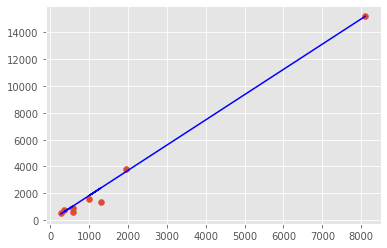

In [ ]:
linear_regression_output(get_x_y(master_list_one, "Covid and Elections"))

# Visulizations, Analysis, Results
-------------------------


## Week 10/15/20-10/20/20

### Visualizations 

#### Methodology

The purpose of this analysis is to look at the relationship between an accounts' tweets with respect to those tweets being liked and retweeted. 
A like to tweet and retweet to tweet ratio will be created for each account in each category with visualizations presented.

In [ ]:
vis_five

covid acct tweet  covid tweet covid acct like  covid like  \
0      @sputnikint         91.0   @actualidadrt        4252   
1    @actualidadrt         51.0         @rt_com        1183   
2          @rt_com         26.0         @rianru         788   
3          @rianru         24.0     @sputnikint         668   
4    @rtenfrancais         22.0   @rtultimahora         379   

  covid acct retweet  covid retweet covid election acct tweet  \
0      @actualidadrt           2797               @sputnikint   
1            @rt_com            692             @sputnikmundo   
2      @rtultimahora            628             @actualidadrt   
3            @rianru            348                  @rt_com    
4      @sputnikmundo            284                   @rianru   

   covid election tweet covid election acct like  covid election like  ...  \
0                    91            @actualidadrt                 4973  ...   
1                    56                  @rt_com                 1183  ...   
2                    53                  @rianru                 1180  ...   
3                    26            @rtultimahora                  668  ...   
4                    24              @sputnikint                  393  ...   

  blm michigan acct like  blm michigan like blm michigan acct retweet  \
0           @sputnik_tr                48.0              @sputnik_fr    
1               @rt_com                27.0                  @rt_com    
2           @sputnikint                24.0             @sputnikint     
3           @sputnik_fr                19.0            @actualidadrt    
4       @actualidadrt                  17.0             @tass_agency    

   blm michigan retweet blm kanye acct tweet  blm kanye tweet  \
0                  24.0        @sputnikint                2.0   
1                  14.0         @sputnik_fr               1.0   
2                   7.0                  NaN              NaN   
3                   6.0                  NaN              NaN   
4                   4.0                  NaN              NaN   

  blm kanye acct like  blm kanye like blm kanye acct retweet  \
0       @sputnik_fr              19.0           @sputnik_fr    
1       @sputnikint               6.0            @sputnikint   
2                 NaN             NaN                    NaN   
3                 NaN             NaN                    NaN   
4                 NaN             NaN                    NaN   

   blm kanye retweet  
0               24.0  
1                4.0  
2                NaN  
3                NaN  
4                NaN  

[5 rows x 72 columns]

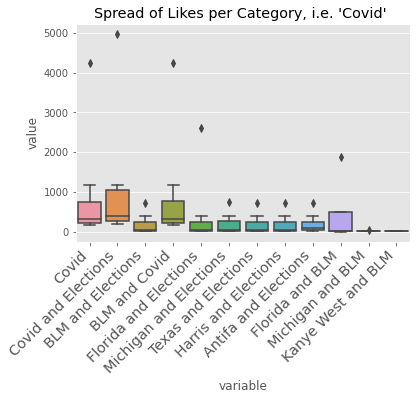

In [ ]:
#Visualization Cell - Boxplots (Likes)

boxplot_visualizations(master_category_list, "like", master_list_five)

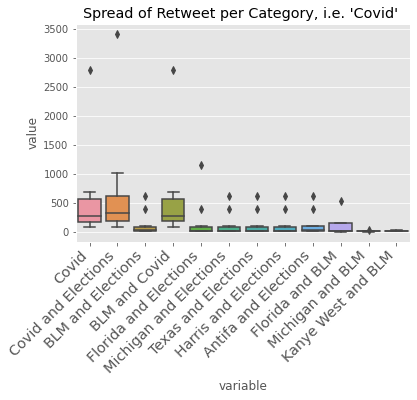

In [ ]:
#Visualization Cell - Boxplots (retweets)

boxplot_visualizations(master_category_list, "retweet", master_list_five)

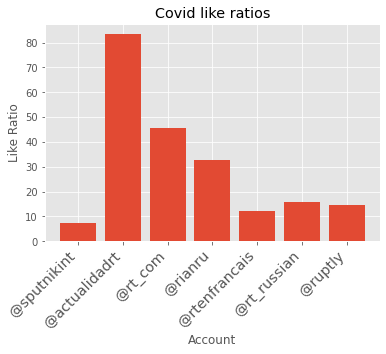

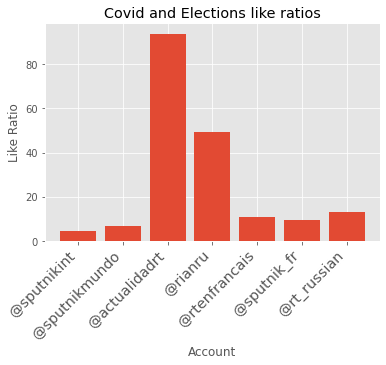

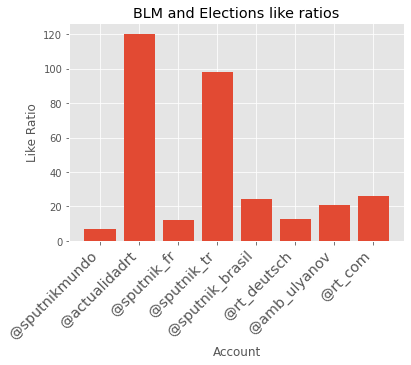

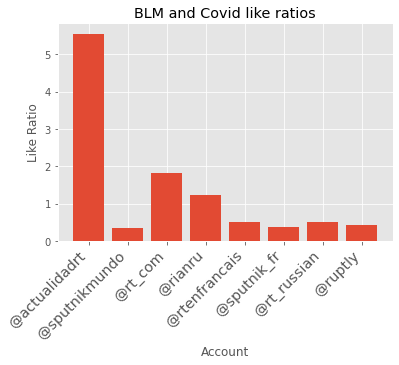

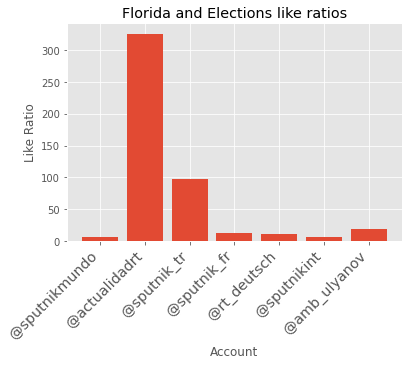

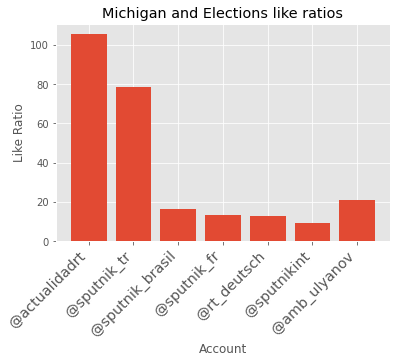

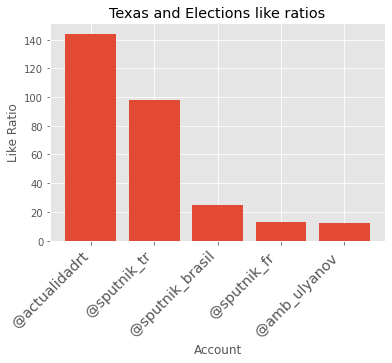

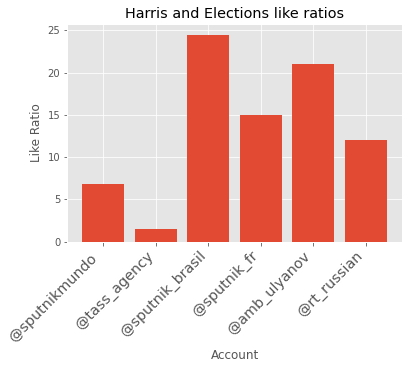

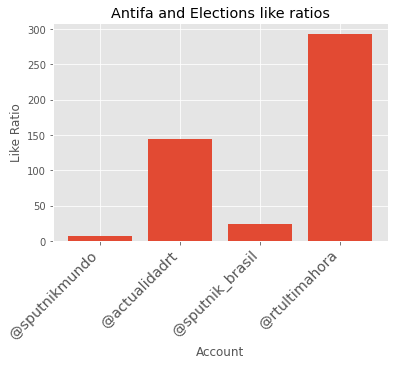

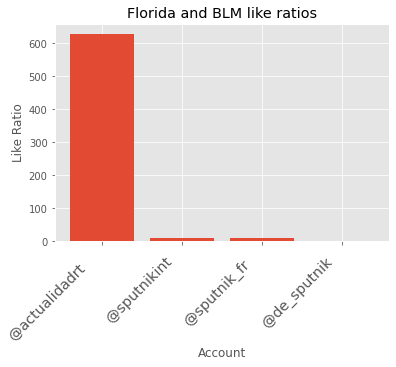

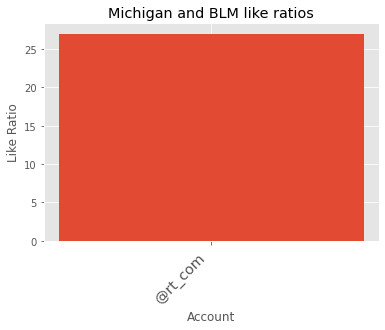

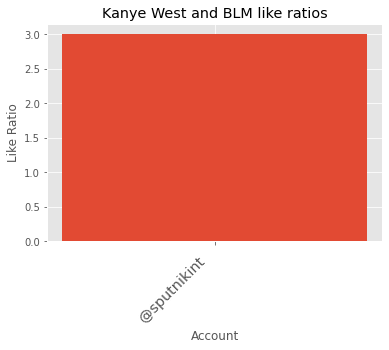

In [ ]:
#Visualization Cell - Bar Graph (Likes)

bar_chart_likes(master_list_five)

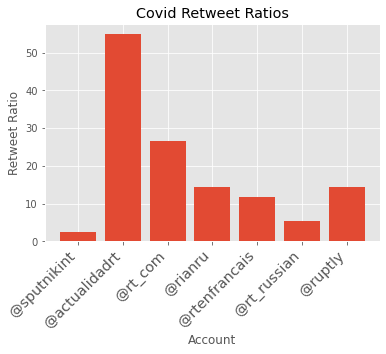

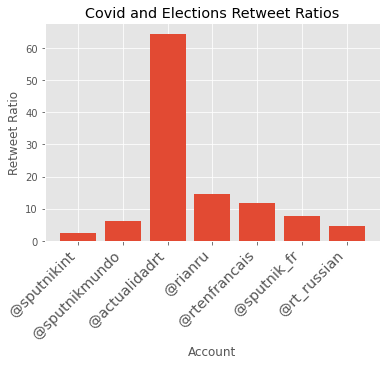

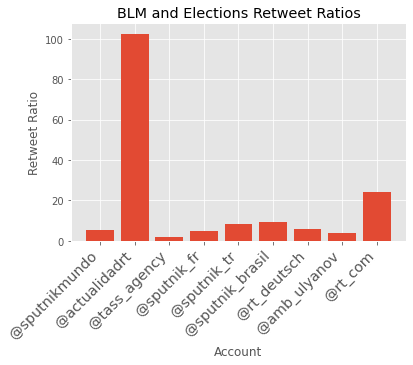

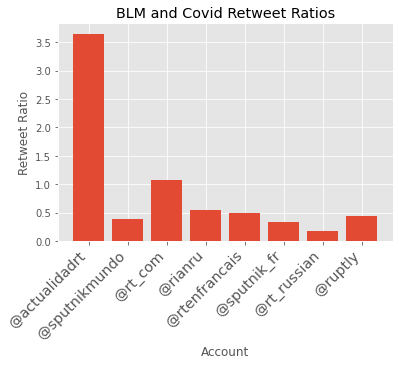

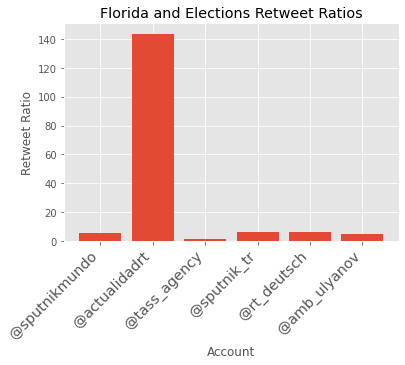

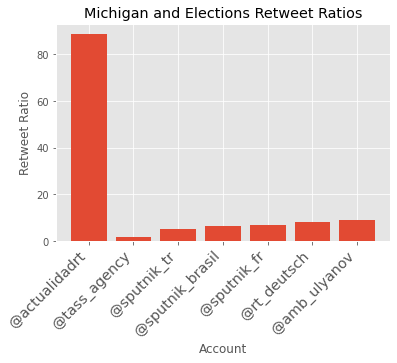

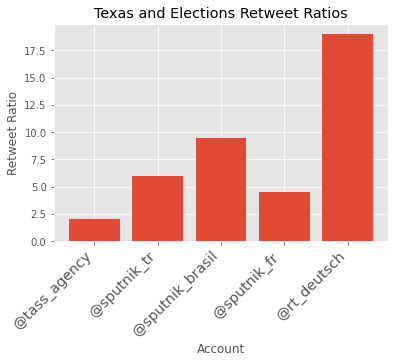

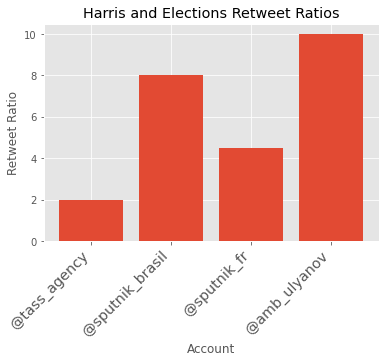

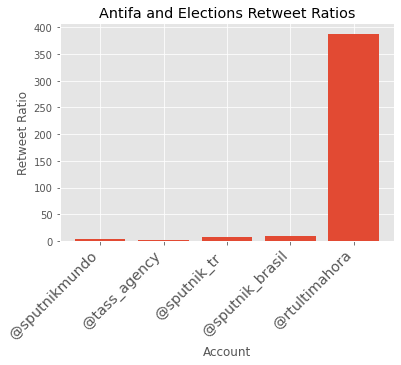

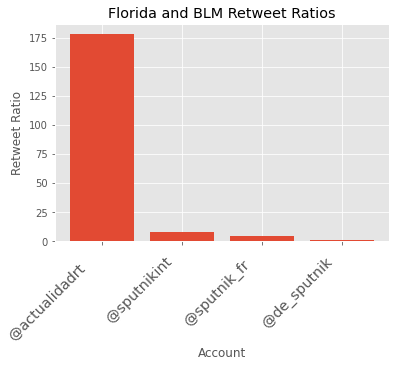

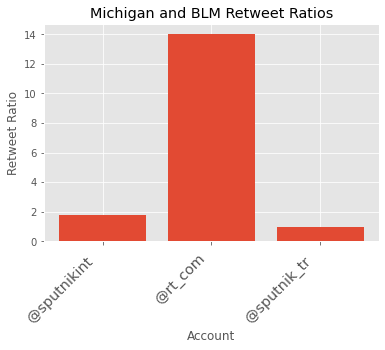

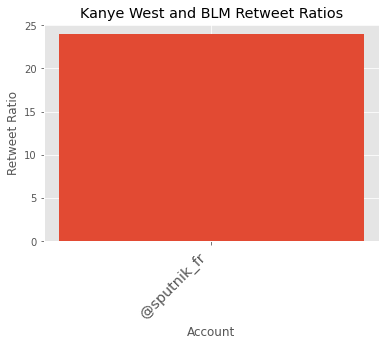

In [ ]:
#Visualization Cell - Bar Graph (Retweets)

bar_chart_retweets(master_list_five)

### 

### Min-Max Functionality:
The output of this code shows the accounts with the most like to tweet ratio and like to retweet ratio, as well as the accounts with the lowest like to tweet ratio and retweet ratio for every category. 


In [ ]:
#Min Max Output

min_max_output(master_list_five)

Covid --> The account with the highest like ratio is @actualidadrt with a 83.37254901960785 like to tweet ratio.
Covid --> The account with the lowest like ratio is @sputnikint with a 7.34065934065934 like to tweet ratio.
Covid --> The account with the highest retweet ratio is @actualidadrt with a 54.84313725490196 retweet to tweet ratio.
Covid --> The account with the lowest retweet ratio is @sputnikint with a 2.4615384615384617 retweet to tweet ratio.


Covid and Elections --> The account with the highest like ratio is @actualidadrt with a 93.83018867924528 like to tweet ratio.
Covid and Elections --> The account with the lowest like ratio is @sputnikint with a 4.318681318681318 like to tweet ratio.
Covid and Elections --> The account with the highest retweet ratio is @actualidadrt with a 64.37735849056604 retweet to tweet ratio.
Covid and Elections --> The account with the lowest retweet ratio is @sputnikint with a 2.5054945054945055 retweet to tweet ratio.


BLM and Elections --> T

### Naive Bayes Probability Results

Naive Bayes Methodology; for the most significant categories

where P(retweet|some category) = (P(some category | retweets) * P(retweets)) / P(some category)

where P(like|some category) = (P(some category | like) * P(like)) / P(some category)

In [ ]:
#Naive Bayes Output - top 4 significant categories

naive_analysis(4, master_list_five)

--> The Probabilitiy of retweets given florida election is:  0.3270321361058602
--> The Probabilitiy of retweets given covid is:  0.40214822771213754
--> The Probabilitiy of retweets given blm covid is:  0.40262519617634474
--> The Probabilitiy of retweets given covid election is:  0.40869618023926646


--> The Probabilitiy of likes given florida election is:  0.67296786389414
--> The Probabilitiy of likes given covid is:  0.5978517722878625
--> The Probabilitiy of likes given blm covid is:  0.5973748038236554
--> The Probabilitiy of likes given covid election is:  0.5913038197607337


### Linear Regression Model

Using Likes as a the dependent variable, and retweets are the independent variable for Covid, Covid & Election, and BLM and Covid

#### Methodology
Each Category captures the top ten accounts for likes and retweets; however, sometimes the kth ranked account for retweets is not the same for the kth account of likes.
Therefore, the regression is not run upon account ranking, but rather likes dependent on retweets of the same account.

Score:  0.9819302944052932
Coef:  [[1.51641561]]
Intercept:  [37.17081503]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     182.3
Date:                Sun, 20 Dec 2020   Prob (F-statistic):           8.69e-07
Time:                        22:13:31   Log-Likelihood:                -69.090
No. Observations:                  10   AIC:                             142.2
Df Residuals:                       8   BIC:                             142.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

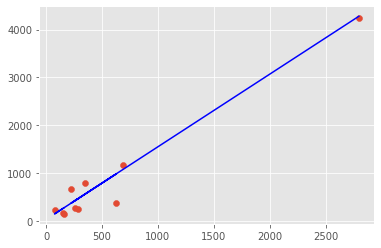

In [ ]:
#Regression

linear_regression_output(get_x_y(master_list_five, "Covid"))

Score:  0.9372488123701502
Coef:  [[1.39798834]]
Intercept:  [26.75074859]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     102.9
Date:                Sun, 20 Dec 2020   Prob (F-statistic):           1.95e-05
Time:                        22:13:32   Log-Likelihood:                -65.789
No. Observations:                   9   AIC:                             135.6
Df Residuals:                       7   BIC:                             136.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

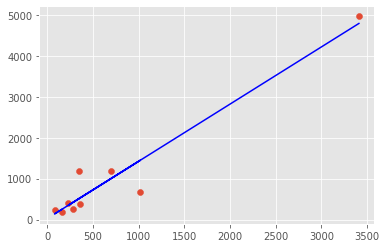

In [ ]:
linear_regression_output(get_x_y(master_list_five, "Covid and Elections"))

Score:  0.5510999372444433
Coef:  [[1.2145786]]
Intercept:  [32.77004113]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     180.9
Date:                Sun, 20 Dec 2020   Prob (F-statistic):           8.95e-07
Time:                        22:13:32   Log-Likelihood:                -69.117
No. Observations:                  10   AIC:                             142.2
Df Residuals:                       8   BIC:                             142.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

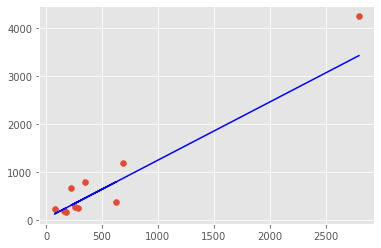

In [ ]:
linear_regression_output(get_x_y(master_list_five, "BLM and Covid"))

----

## Week 10/7/20-10/14/20

### Visualizations

In [ ]:
vis_four

covid acct tweet  covid tweet covid acct like  covid like  \
0      @sputnikint          275   @actualidadrt        8379   
1    @sputnikmundo          152   @rtultimahora        5431   
2    @actualidadrt          115         @rt_com        5339   
3    @rtenfrancais          103     @sputnikint        1617   
4          @rt_com           93   @sputnikmundo        1245   

  covid acct retweet  covid retweet covid election acct tweet  \
0      @actualidadrt           5663               @sputnikint   
1      @rtultimahora           4912             @sputnikmundo   
2            @rt_com           3315             @actualidadrt   
3      @sputnikmundo           1149             @rtenfrancais   
4      @rtenfrancais           1062                   @rt_com   

   covid election tweet covid election acct like  covid election like  ...  \
0                   283            @actualidadrt                 8559  ...   
1                   166            @rtultimahora                 5431  ...   
2                   121                  @rt_com                 5400  ...   
3                   109              @sputnikint                 1682  ...   
4                    96            @sputnikmundo                 1384  ...   

  blm michigan acct like  blm michigan like blm michigan acct retweet  \
0                @rt_com              286.0                   @rt_com   
1            @sputnik_tr               70.0               @sputnikint   
2           @rtarabic_bn               52.0             @actualidadrt   
3            @sputnikint               50.0             @sputnikmundo   
4          @actualidadrt               49.0           @sputnik_brasil   

   blm michigan retweet blm kanye acct tweet  blm kanye tweet  \
0                 159.0              @rt_com              5.0   
1                  37.0          @sputnikint              3.0   
2                  29.0        @actualidadrt              2.0   
3                  25.0          @rt_america              1.0   
4                  13.0          @rt_deutsch              1.0   

  blm kanye acct like  blm kanye like blm kanye acct retweet  \
0             @rt_com           183.0                @rt_com   
1       @actualidadrt            71.0          @actualidadrt   
2         @sputnik_tr            34.0            @sputnikint   
3         @sputnikint            14.0            @sputnik_tr   
4         @rt_deutsch             3.0            @rt_deutsch   

   blm kanye retweet  
0              116.0  
1               19.0  
2                8.0  
3                4.0  
4                1.0  

[5 rows x 72 columns]

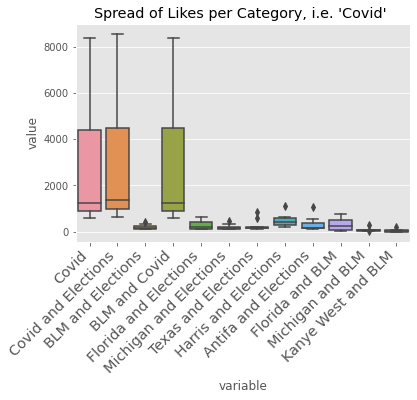

In [ ]:
#Visualization Cell - Boxplots (Likes)

boxplot_visualizations(master_category_list, "like", master_list_four)

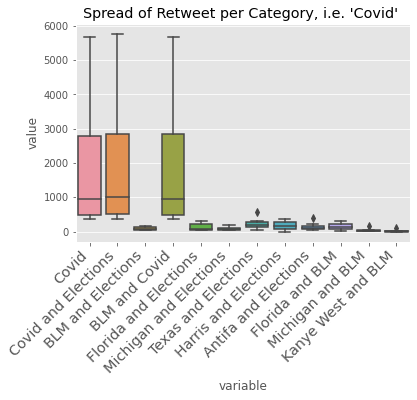

In [ ]:
#Visualization Cell - Boxplots (retweets)

boxplot_visualizations(master_category_list, "retweet", master_list_four)

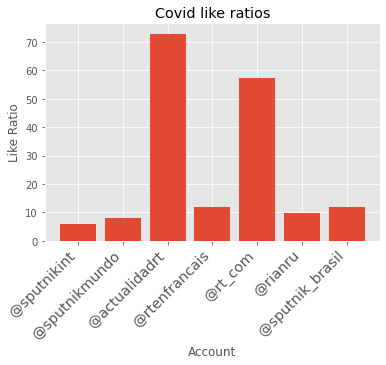

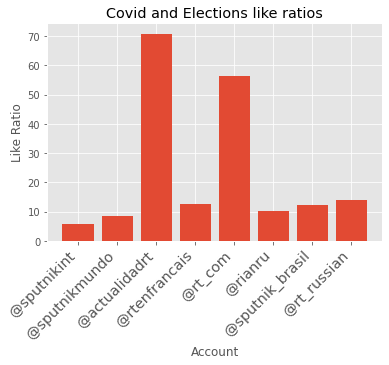

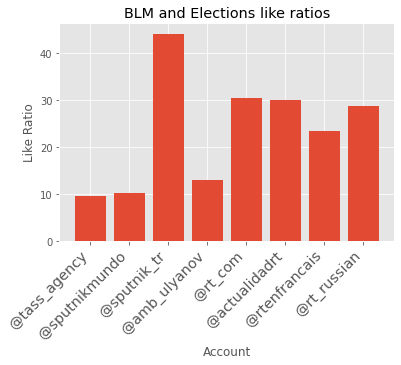

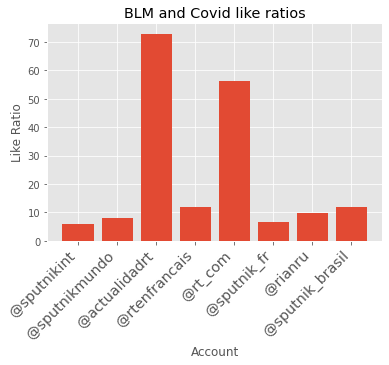

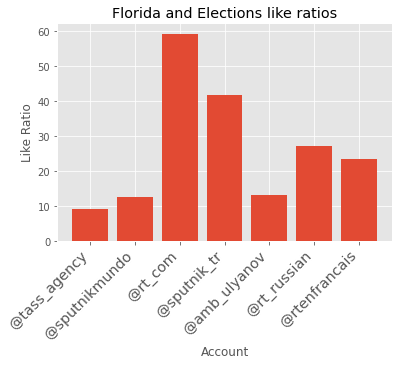

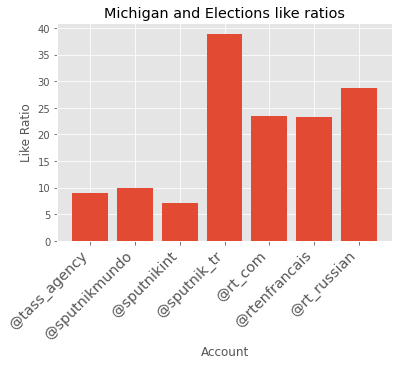

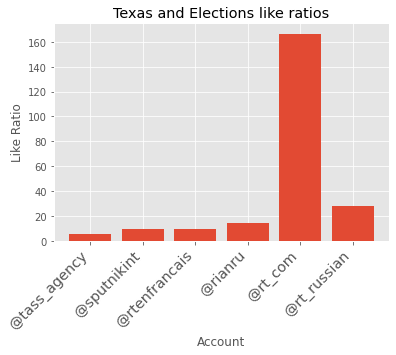

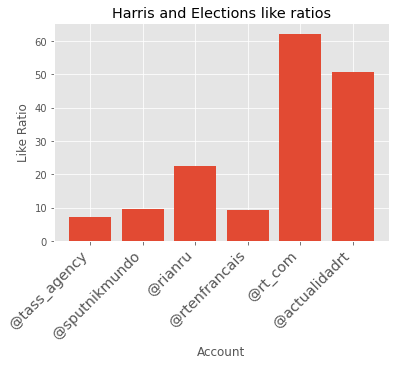

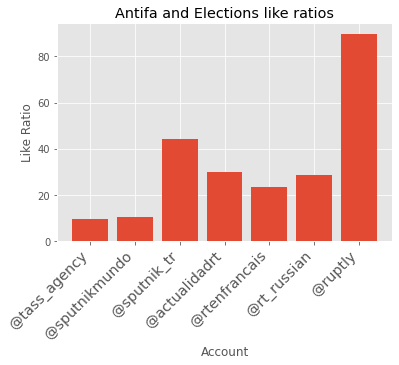

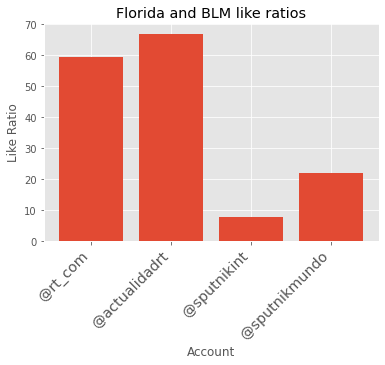

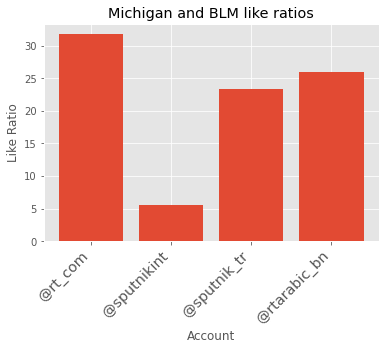

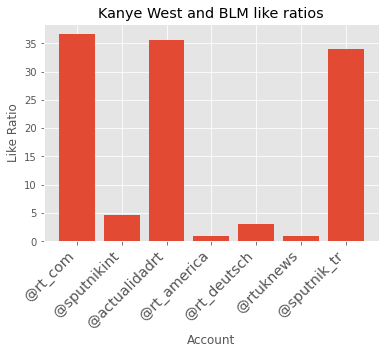

In [ ]:
#Visualization Cell - Bar Graph (Likes)

bar_chart_likes(master_list_four)

### 

### Min-Max Functionality:
The output of this code shows the accounts with the most like to tweet ratio and like to retweet ratio, as well as the accounts with the lowest like to tweet ratio and retweet ratio for every category. 


In [ ]:
min_max_output(master_list_four)

Covid --> The account with the highest like ratio is @actualidadrt with a 72.86086956521739 like to tweet ratio.
Covid --> The account with the lowest like ratio is @sputnikint with a 5.88 like to tweet ratio.
Covid --> The account with the highest retweet ratio is @actualidadrt with a 49.243478260869566 retweet to tweet ratio.
Covid --> The account with the lowest retweet ratio is @sputnikint with a 3.061818181818182 retweet to tweet ratio.


Covid and Elections --> The account with the highest like ratio is @actualidadrt with a 70.73553719008264 like to tweet ratio.
Covid and Elections --> The account with the lowest like ratio is @sputnikint with a 5.943462897526501 like to tweet ratio.
Covid and Elections --> The account with the highest retweet ratio is @actualidadrt with a 47.611570247933884 retweet to tweet ratio.
Covid and Elections --> The account with the lowest retweet ratio is @sputnikint with a 3.091872791519435 retweet to tweet ratio.


BLM and Elections --> The account w

### Naive Bayes Probability Results

Naive Bayes Methodology; for the most significant categories

where P(retweet|some category) = (P(some category | retweets) * P(retweets)) / P(some category)

where P(like|some category) = (P(some category | like) * P(like)) / P(some category)

In [ ]:
#Naive Bayes Output - top 4 significant categories

naive_analysis(4, master_list_five)

--> The Probabilitiy of retweets given florida election is:  0.3270321361058602
--> The Probabilitiy of retweets given covid is:  0.40214822771213754
--> The Probabilitiy of retweets given blm covid is:  0.40262519617634474
--> The Probabilitiy of retweets given covid election is:  0.40869618023926646


--> The Probabilitiy of likes given florida election is:  0.67296786389414
--> The Probabilitiy of likes given covid is:  0.5978517722878625
--> The Probabilitiy of likes given blm covid is:  0.5973748038236554
--> The Probabilitiy of likes given covid election is:  0.5913038197607337


### Linear Regression Model

Using Likes as a the dependent variable, and retweets are the independent variable for Covid, Covid & Election, and BLM and Covid

Score:  0.9407607980716925
Coef:  [[1.30066698]]
Intercept:  [292.04427726]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     99.57
Date:                Sun, 20 Dec 2020   Prob (F-statistic):           5.86e-05
Time:                        22:13:35   Log-Likelihood:                -62.971
No. Observations:                   8   AIC:                             129.9
Df Residuals:                       6   BIC:                             130.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

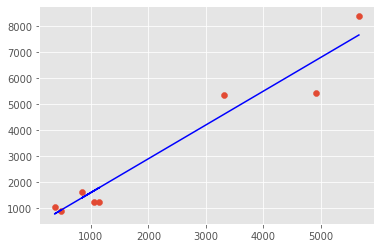

In [ ]:
#Regression

linear_regression_output(get_x_y(master_list_four, "Covid"))

Score:  0.9031548522252781
Coef:  [[1.13148523]]
Intercept:  [465.22618374]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     97.11
Date:                Sun, 20 Dec 2020   Prob (F-statistic):           6.30e-05
Time:                        22:13:35   Log-Likelihood:                -63.104
No. Observations:                   8   AIC:                             130.2
Df Residuals:                       6   BIC:                             130.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

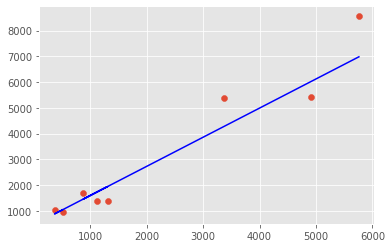

In [ ]:
linear_regression_output(get_x_y(master_list_four, "Covid and Elections"))

Score:  0.94303405793658
Coef:  [[1.31569707]]
Intercept:  [261.7616638]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     106.9
Date:                Sun, 20 Dec 2020   Prob (F-statistic):           4.79e-05
Time:                        22:13:35   Log-Likelihood:                -62.898
No. Observations:                   8   AIC:                             129.8
Df Residuals:                       6   BIC:                             130.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

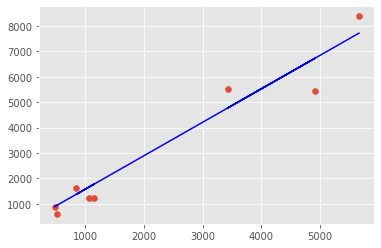

In [ ]:
linear_regression_output(get_x_y(master_list_four, "BLM and Covid"))

## Week 9/30/20-10/6/20

### Visualizations

In [ ]:
vis_three

covid acct tweet  covid tweet covid acct like  covid like  \
0      @sputnikint          242   @actualidadrt       13300   
1    @sputnikmundo          135   @rtultimahora        3331   
2    @actualidadrt          100         @rt_com        6034   
3    @rtenfrancais           75     @sputnikint        1919   
4          @rt_com           94   @sputnikmundo        1142   

  covid acct retweet  covid retweet covid election acct tweet  \
0      @actualidadrt           8020               @sputnikint   
1      @rtultimahora           4912             @sputnikmundo   
2            @rt_com           2852             @actualidadrt   
3      @sputnikmundo           1018             @rtenfrancais   
4      @rtenfrancais            939                   @rt_com   

   covid election tweet covid election acct like  covid election like  ...  \
0                   251            @actualidadrt                13600  ...   
1                   145            @rtultimahora                 3551  ...   
2                   110                  @rt_com                 6034  ...   
3                    78              @sputnikint                 1972  ...   
4                    94            @sputnikmundo                 1234  ...   

  blm michigan acct like  blm michigan like blm michigan acct retweet  \
0            @sputnik_tr               48.0               @sputnik_fr   
1                @rt_com               27.0                   @rt_com   
2            @sputnikint               24.0               @sputnikint   
3            @sputnik_fr               19.0             @actualidadrt   
4          @actualidadrt               17.0              @tass_agency   

   blm michigan retweet blm kanye acct tweet  blm kanye tweet  \
0                  24.0          @sputnikint              2.0   
1                  14.0          @sputnik_fr              1.0   
2                   7.0                  NaN              NaN   
3                   6.0                  NaN              NaN   
4                   4.0                  NaN              NaN   

  blm kanye acct like  blm kanye like blm kanye acct retweet  \
0         @sputnik_fr            19.0            @sputnik_fr   
1         @sputnikint             6.0            @sputnikint   
2                 NaN             NaN                    NaN   
3                 NaN             NaN                    NaN   
4                 NaN             NaN                    NaN   

   blm kanye retweet  
0               24.0  
1                4.0  
2                NaN  
3                NaN  
4                NaN  

[5 rows x 72 columns]

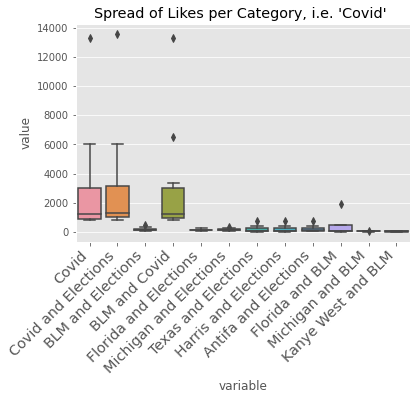

In [ ]:
#Visualization Cell - Boxplots (Likes)

boxplot_visualizations(master_category_list, "like", master_list_three)

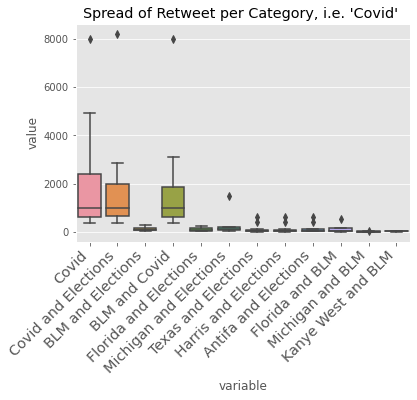

In [ ]:
#Visualization Cell - Boxplots (retweets)

boxplot_visualizations(master_category_list, "retweet", master_list_three)

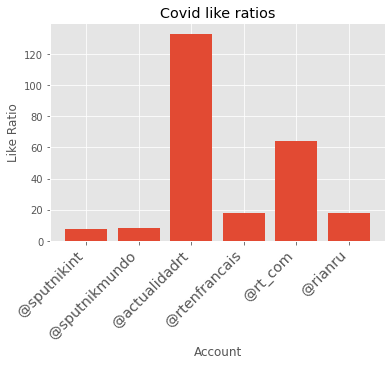

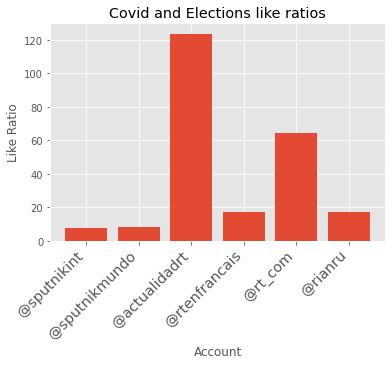

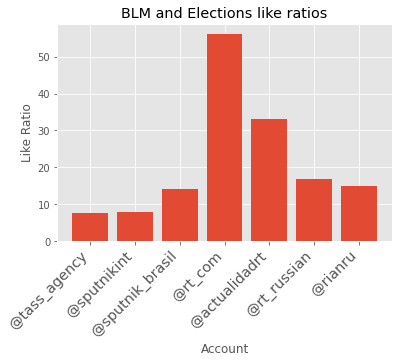

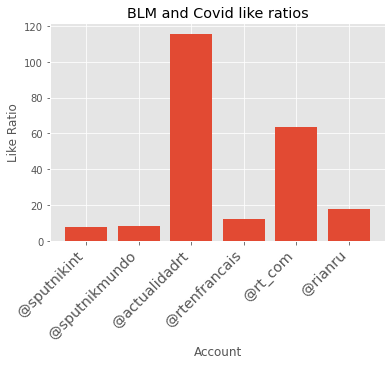

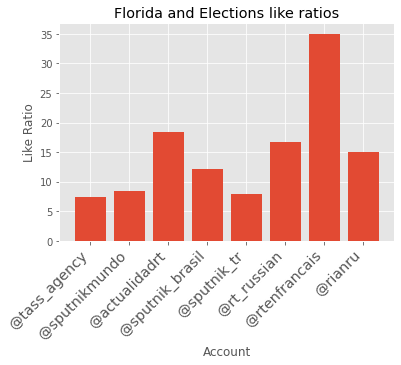

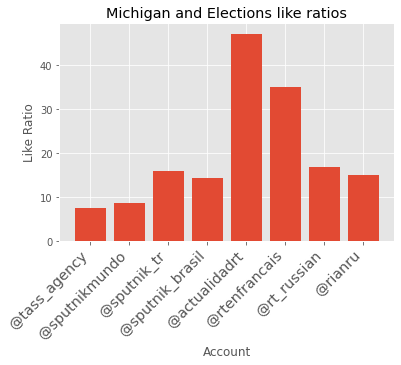

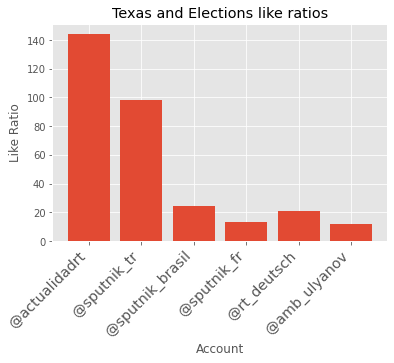

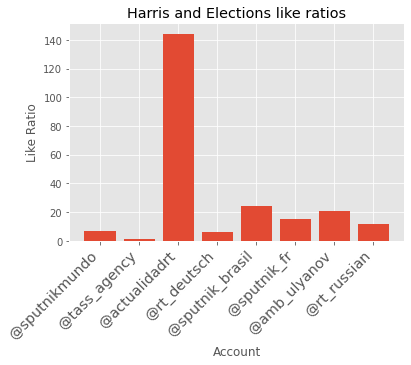

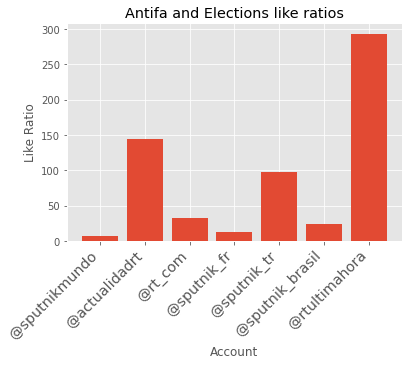

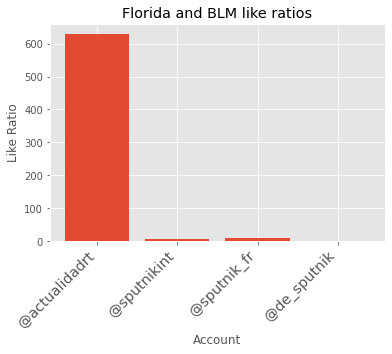

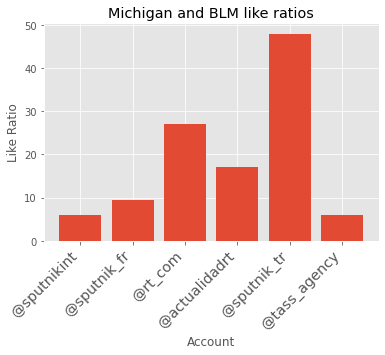

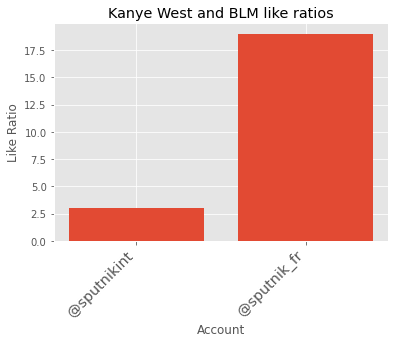

In [ ]:
#Visualization Cell - Bar Graph (Likes)

bar_chart_likes(master_list_three)

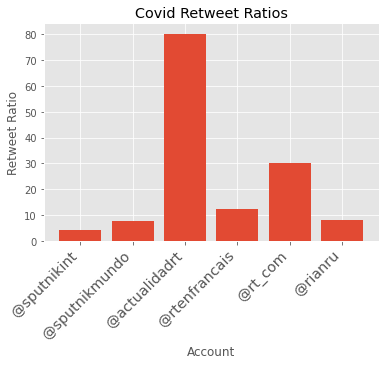

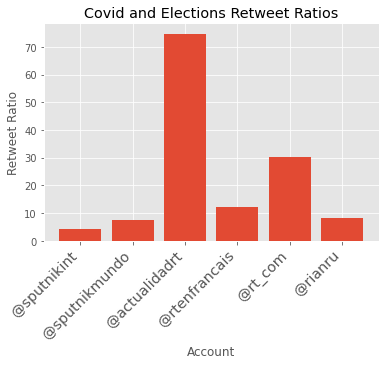

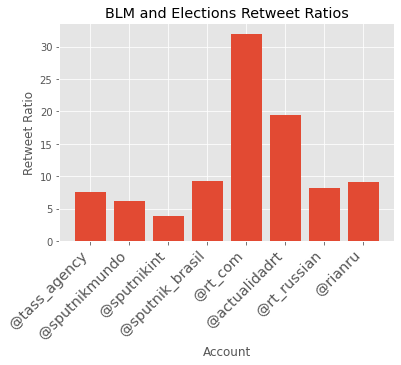

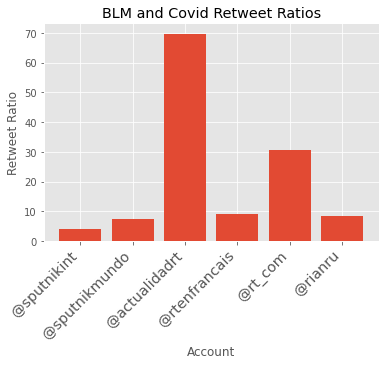

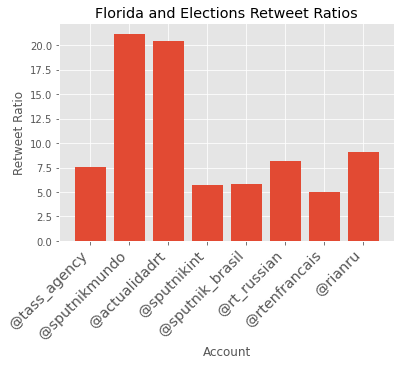

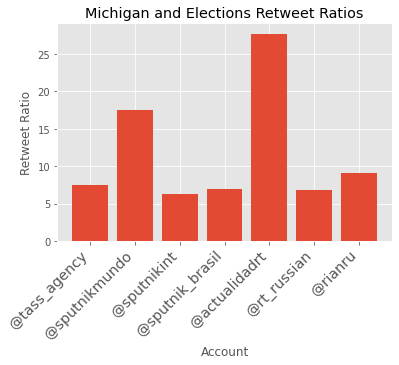

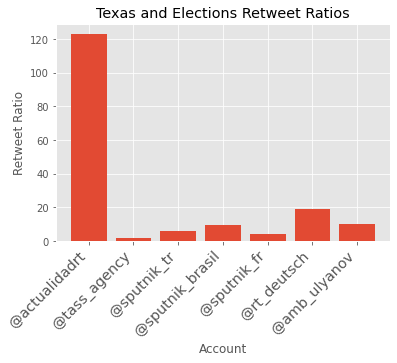

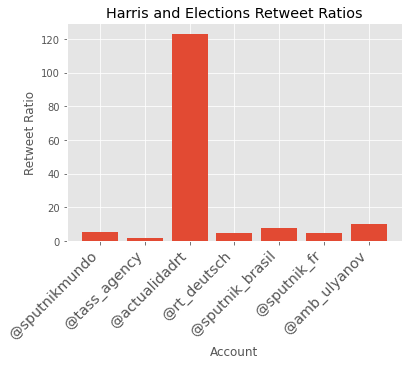

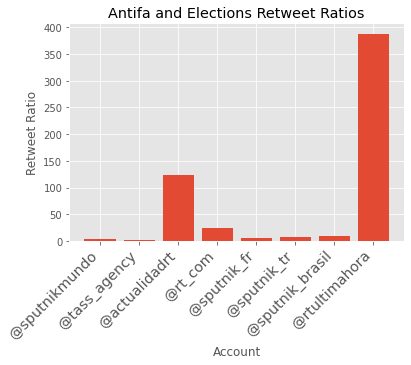

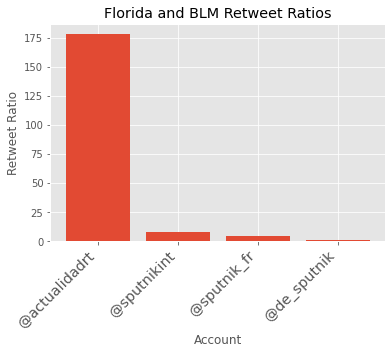

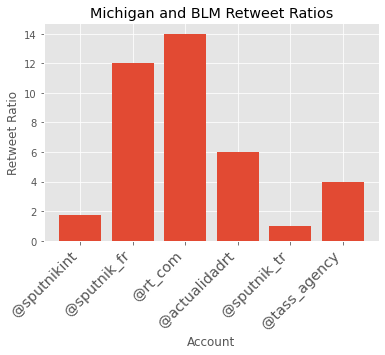

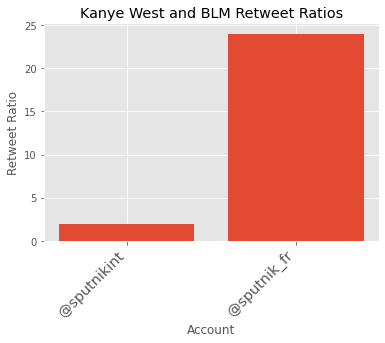

In [ ]:
bar_chart_retweets(master_list_three)

### 

### Min-Max Functionality:
The output of this code shows the accounts with the most like to tweet ratio and like to retweet ratio, as well as the accounts with the lowest like to tweet ratio and retweet ratio for every category. 


In [ ]:
#Min Max Output

min_max_output(master_list_three)

Covid --> The account with the highest like ratio is @actualidadrt with a 133.0 like to tweet ratio.
Covid --> The account with the lowest like ratio is @sputnikint with a 7.929752066115703 like to tweet ratio.
Covid --> The account with the highest retweet ratio is @actualidadrt with a 80.2 retweet to tweet ratio.
Covid --> The account with the lowest retweet ratio is @sputnikint with a 4.144628099173554 retweet to tweet ratio.


Covid and Elections --> The account with the highest like ratio is @actualidadrt with a 123.63636363636364 like to tweet ratio.
Covid and Elections --> The account with the lowest like ratio is @sputnikint with a 7.856573705179283 like to tweet ratio.
Covid and Elections --> The account with the highest retweet ratio is @actualidadrt with a 74.67272727272727 retweet to tweet ratio.
Covid and Elections --> The account with the lowest retweet ratio is @sputnikint with a 4.115537848605578 retweet to tweet ratio.


BLM and Elections --> The account with the highe

### Naive Bayes Probability Results

Naive Bayes Methodology; for the most significant categories

where P(retweet|some category) = (P(some category | retweets) * P(retweets)) / P(some category)

where P(like|some category) = (P(some category | like) * P(like)) / P(some category)

In [ ]:
#Naive Bayes Output - top 4 significant categories

naive_analysis(4, master_list_three)

--> The Probabilitiy of retweets given blm florida is:  0.2273819055244195
--> The Probabilitiy of retweets given covid is:  0.40699708454810496
--> The Probabilitiy of retweets given blm covid is:  0.373156372023388
--> The Probabilitiy of retweets given covid election is:  0.37255800059743105


--> The Probabilitiy of likes given blm florida is:  0.7726180944755804
--> The Probabilitiy of likes given covid is:  0.5930029154518951
--> The Probabilitiy of likes given blm covid is:  0.626843627976612
--> The Probabilitiy of likes given covid election is:  0.627441999402569


### Linear Regression Model

Using Likes as a the dependent variable, and retweets are the independent variable for Covid, Covid & Election, and BLM and Covid

Score:  0.8563218889792408
Coef:  [[1.47425516]]
Intercept:  [-455.53233444]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     30.12
Date:                Sun, 20 Dec 2020   Prob (F-statistic):            0.00153
Time:                        22:13:40   Log-Likelihood:                -70.535
No. Observations:                   8   AIC:                             145.1
Df Residuals:                       6   BIC:                             145.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

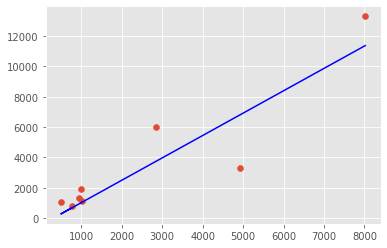

In [ ]:
#Regression

linear_regression_output(get_x_y(master_list_three, "Covid"))

Score:  0.9216598913154258
Coef:  [[2.10301374]]
Intercept:  [-552.62370683]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     322.6
Date:                Sun, 20 Dec 2020   Prob (F-statistic):           1.92e-06
Time:                        22:13:40   Log-Likelihood:                -61.836
No. Observations:                   8   AIC:                             127.7
Df Residuals:                       6   BIC:                             127.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

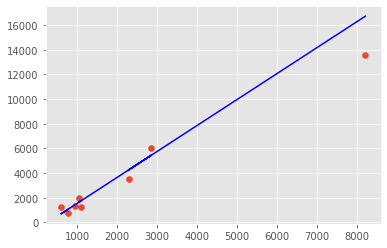

In [ ]:
linear_regression_output(get_x_y(master_list_three, "Covid and Elections"))

Score:  0.9805102384963242
Coef:  [[1.7033352]]
Intercept:  [-35.63170848]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     313.8
Date:                Sun, 20 Dec 2020   Prob (F-statistic):           2.08e-06
Time:                        22:13:40   Log-Likelihood:                -61.896
No. Observations:                   8   AIC:                             127.8
Df Residuals:                       6   BIC:                             128.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

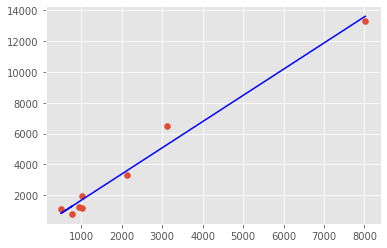

In [ ]:
linear_regression_output(get_x_y(master_list_three, "BLM and Covid"))

____

## Week 9/23/20-9/29/20

### Visualizations

In [ ]:
vis_two

covid acct tweet  covid tweet covid acct like  covid like  \
0      @sputnikint          154   @actualidadrt        5068   
1    @sputnikmundo          126   @rtultimahora         672   
2    @actualidadrt           57         @rt_com        2172   
3    @rtenfrancais           83     @sputnikint         896   
4          @rt_com           51   @sputnikmundo        1060   

  covid acct retweet  covid retweet covid election acct tweet  \
0      @actualidadrt           3317               @sputnikint   
1      @rtultimahora            594             @sputnikmundo   
2            @rt_com           1381             @actualidadrt   
3      @sputnikmundo           1003             @rtenfrancais   
4      @rtenfrancais            983                   @rt_com   

   covid election tweet covid election acct like  covid election like  ...  \
0                   159            @actualidadrt                 5509  ...   
1                   142            @rtultimahora                  672  ...   
2                    65                  @rt_com                 2229  ...   
3                    91              @sputnikint                  959  ...   
4                    54            @sputnikmundo                 1188  ...   

  blm michigan acct like  blm michigan like blm michigan acct retweet  \
0                @rt_com             1410.0                   @rt_com   
1          @actualidadrt              107.0             @actualidadrt   
2            @sputnikint               48.0               @sputnikint   
3                @ruptly               24.0                   @ruptly   
4          @renegade_inc                6.0             @rtenfrancais   

   blm michigan retweet blm kanye acct tweet  blm kanye tweet  \
0                 860.0              @rt_com             18.0   
1                  75.0          @sputnikint              8.0   
2                  22.0        @actualidadrt              2.0   
3                  21.0              @ruptly              2.0   
4                   9.0        @renegade_inc              1.0   

  blm kanye acct like  blm kanye like blm kanye acct retweet  \
0             @rt_com          1493.0                @rt_com   
1       @actualidadrt           107.0          @actualidadrt   
2         @sputnikint            46.0                @ruptly   
3             @ruptly            24.0            @sputnikint   
4       @renegade_inc             6.0          @rtenfrancais   

   blm kanye retweet  
0              884.0  
1               75.0  
2               21.0  
3               21.0  
4                9.0  

[5 rows x 72 columns]

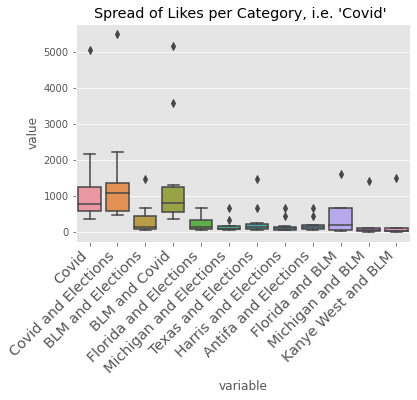

In [ ]:
#Visualization Cell - Boxplots (Likes)

boxplot_visualizations(master_category_list, "like", master_list_two)

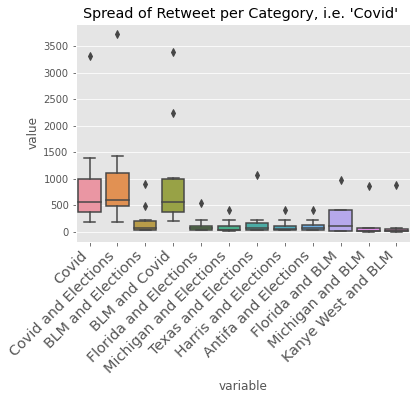

In [ ]:
#Visualization Cell - Boxplots (retweets)

boxplot_visualizations(master_category_list, "retweet", master_list_two)

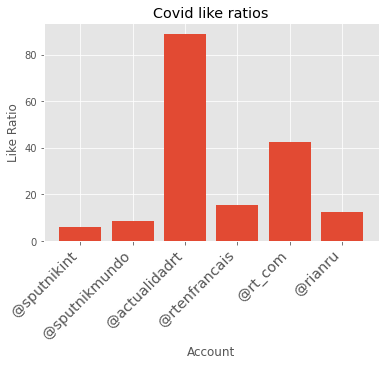

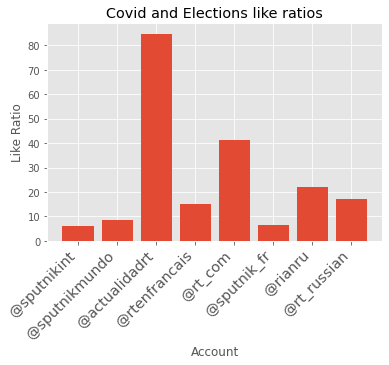

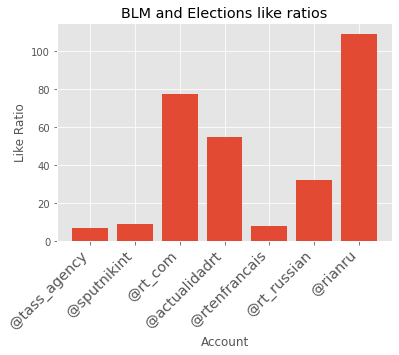

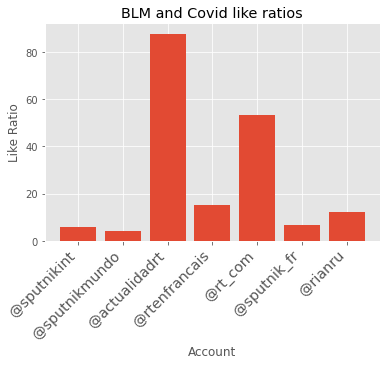

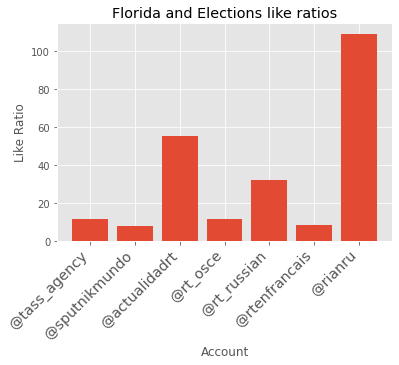

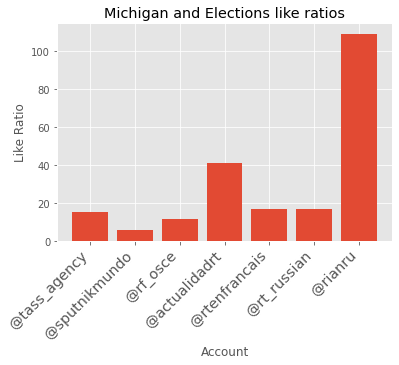

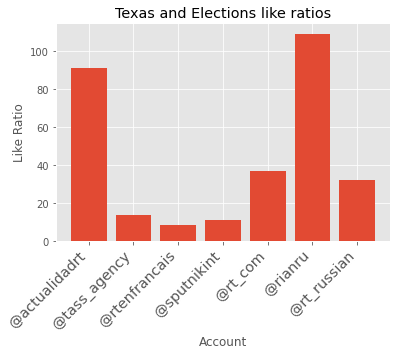

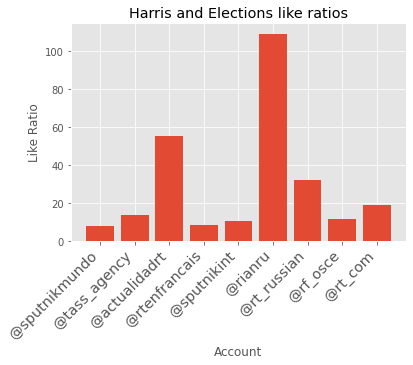

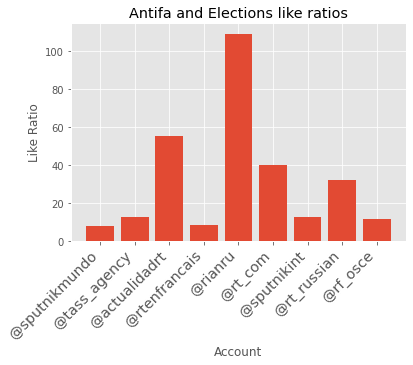

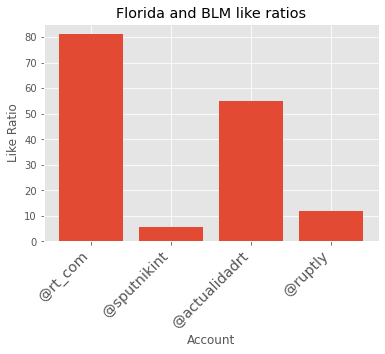

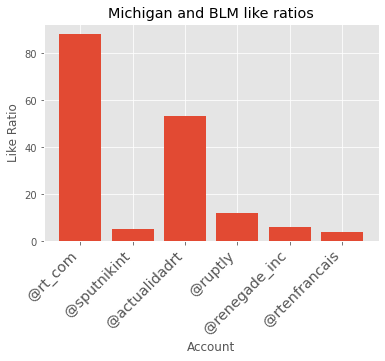

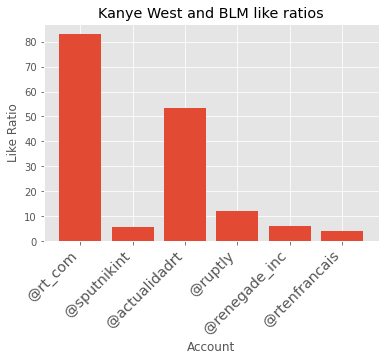

In [ ]:
#Visualization Cell - Bar Graph (Likes)

bar_chart_likes(master_list_two)

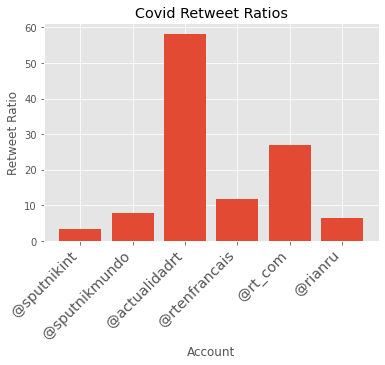

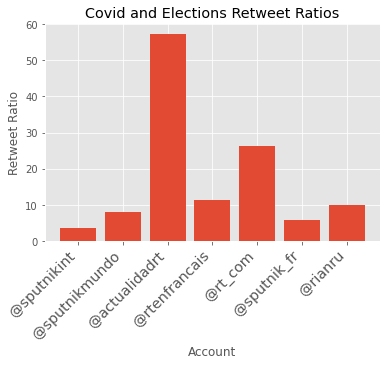

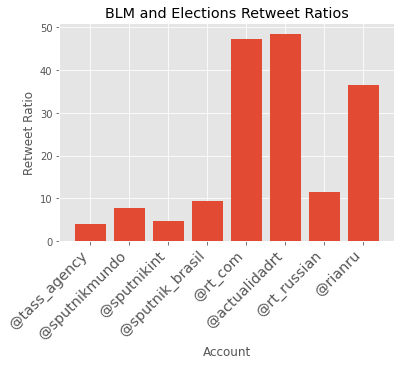

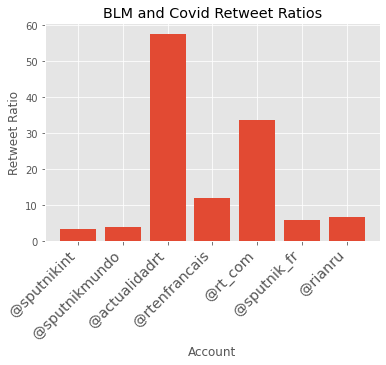

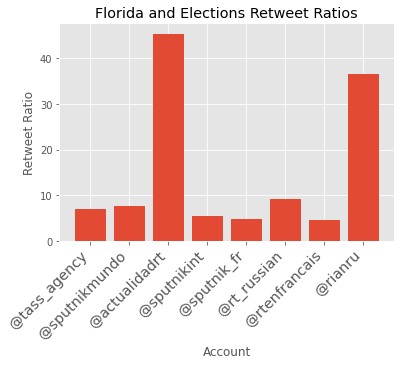

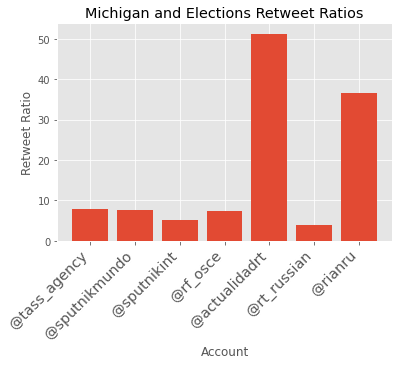

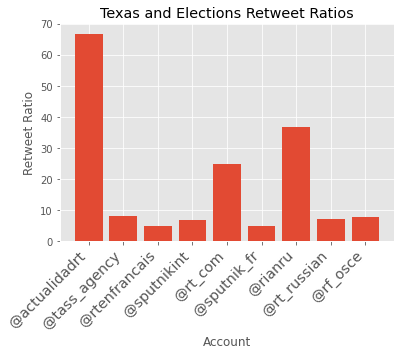

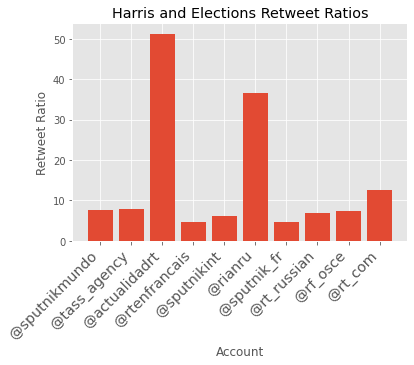

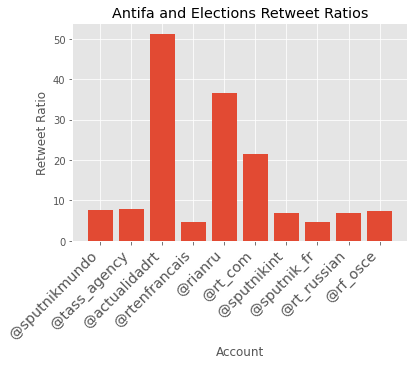

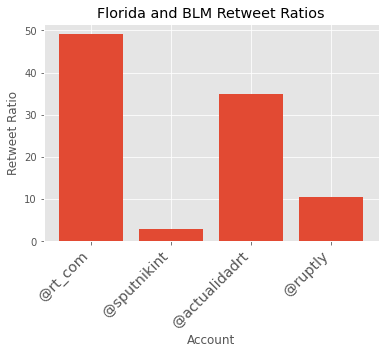

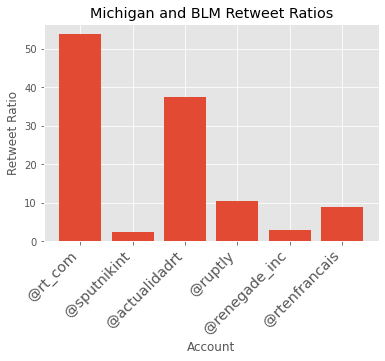

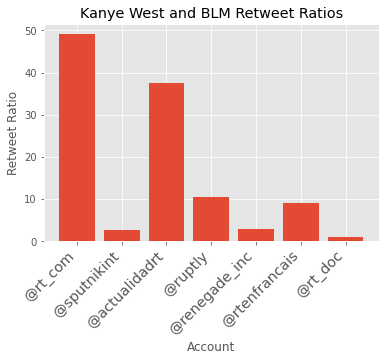

In [ ]:
#Visualization Cell - Bar Graph (Retweets)

bar_chart_retweets(master_list_two)

### 

### Min-Max Functionality:
The output of this code shows the accounts with the most like to tweet ratio and like to retweet ratio, as well as the accounts with the lowest like to tweet ratio and retweet ratio for every category. 


In [ ]:
#Min Max Output

min_max_output(master_list_two)

Covid --> The account with the highest like ratio is @actualidadrt with a 88.91228070175438 like to tweet ratio.
Covid --> The account with the lowest like ratio is @sputnikint with a 5.818181818181818 like to tweet ratio.
Covid --> The account with the highest retweet ratio is @actualidadrt with a 58.19298245614035 retweet to tweet ratio.
Covid --> The account with the lowest retweet ratio is @sputnikint with a 3.3636363636363638 retweet to tweet ratio.


Covid and Elections --> The account with the highest like ratio is @actualidadrt with a 84.75384615384615 like to tweet ratio.
Covid and Elections --> The account with the lowest like ratio is @sputnikint with a 6.031446540880503 like to tweet ratio.
Covid and Elections --> The account with the highest retweet ratio is @actualidadrt with a 57.33846153846154 retweet to tweet ratio.
Covid and Elections --> The account with the lowest retweet ratio is @sputnikint with a 3.4779874213836477 retweet to tweet ratio.


BLM and Elections --> 

### Naive Bayes Probability Results

Naive Bayes Methodology; for the most significant categories

where P(retweet|some category) = (P(some category | retweets) * P(retweets)) / P(some category)

where P(like|some category) = (P(some category | like) * P(like)) / P(some category)


In [ ]:
#Naive Bayes Output - top 4 significant categories

naive_analysis(4, master_list_two)

--> The Probabilitiy of retweets given blm election is:  0.37462630792227203
--> The Probabilitiy of retweets given covid is:  0.4058966074313409
--> The Probabilitiy of retweets given blm covid is:  0.4068559837728194
--> The Probabilitiy of retweets given covid election is:  0.40257271145989243


--> The Probabilitiy of likes given blm election is:  0.625373692077728
--> The Probabilitiy of likes given covid is:  0.5941033925686592
--> The Probabilitiy of likes given blm covid is:  0.5931440162271805
--> The Probabilitiy of likes given covid election is:  0.5974272885401076


### Linear Regression Model

Using Likes as a the dependent variable, and retweets are the independent variable for Covid, Covid & Election, and BLM and Covid

Score:  0.9810308070635463
Coef:  [[1.53862514]]
Intercept:  [-82.09266954]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     319.3
Date:                Sun, 20 Dec 2020   Prob (F-statistic):           1.97e-06
Time:                        22:13:45   Log-Likelihood:                -53.451
No. Observations:                   8   AIC:                             110.9
Df Residuals:                       6   BIC:                             111.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

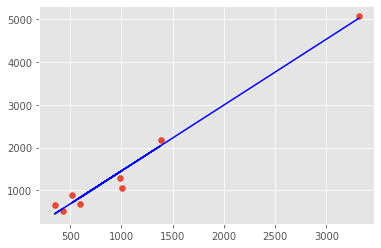

In [ ]:
#Regression

linear_regression_output(get_x_y(master_list_two, "Covid"))

Score:  0.9871912967005517
Coef:  [[1.44439978]]
Intercept:  [118.33705069]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     240.9
Date:                Sun, 20 Dec 2020   Prob (F-statistic):           1.11e-06
Time:                        22:13:45   Log-Likelihood:                -62.369
No. Observations:                   9   AIC:                             128.7
Df Residuals:                       7   BIC:                             129.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

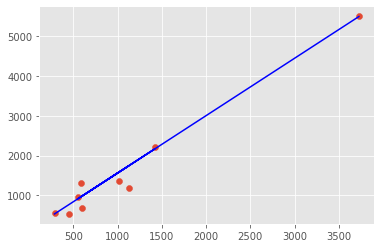

In [ ]:
linear_regression_output(get_x_y(master_list_two, "Covid and Elections"))

Score:  0.9938574581634867
Coef:  [[1.57497459]]
Intercept:  [-112.05208574]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     459.5
Date:                Sun, 20 Dec 2020   Prob (F-statistic):           1.21e-07
Time:                        22:13:45   Log-Likelihood:                -60.064
No. Observations:                   9   AIC:                             124.1
Df Residuals:                       7   BIC:                             124.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

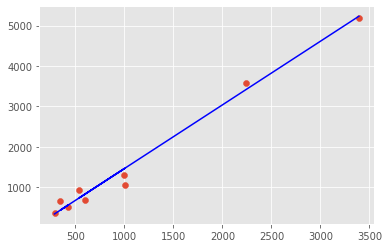

In [ ]:
linear_regression_output(get_x_y(master_list_two, "BLM and Covid"))

## Week 9/16/20-9/22/20

### Visualizations 

In [ ]:
vis_one

covid acct tweet  covid tweet covid acct like  covid like  \
0         @sputnik          170   @actualidadrt       14600   
1    @sputnikmundo          130         @rt_com        3706   
2   @actualidadrt            96   @rtultimahora        1244   
3          @rt_com           71   @sputnikmundo        1233   
4     @sputnik_fr            60    @rusembindia        1040   

  covid acct retweet  covid retweet covid election acct tweet  \
0      @actualidadrt           7653             @sputnikmundo   
1            @rt_com           1900             @actualidadrt   
2      @sputnikmundo           1197                   @rt_com   
3      @rtultimahora            769             @rtenfrancais   
4        @sputnikint            591               @sputnik_fr   

   covid election tweet covid election acct like  covid election like  ...  \
0                 143.0            @actualidadrt                15200  ...   
1                 110.0                  @rt_com                 3776  ...   
2                  73.0            @rtultimahora                 1587  ...   
3                  63.0            @sputnikmundo                 1331  ...   
4                  61.0             @rusembindia                 1040  ...   

  blm michigan acct like  blm michigan like blm michigan acct retweet  \
0          @actualidadrt              878.0             @actualidadrt   
1                @rt_com              704.0                   @rt_com   
2       @redactedtonight               57.0                   @ruptly   
3                @ruptly               35.0                 @rtuknews   
4              @rtuknews               18.0               @sputnikint   

   blm michigan retweet blm kanye acct tweet  blm kanye tweet  \
0                 642.0              @rt_com              9.0   
1                 397.0            @rtuknews              3.0   
2                  28.0          @sputnikint              3.0   
3                   9.0     @redactedtonight              1.0   
4                   6.0        @actualidadrt              1.0   

  blm kanye acct like  blm kanye like blm kanye acct retweet  \
0             @rt_com           414.0                @rt_com   
1       @actualidadrt            66.0          @actualidadrt   
2    @redactedtonight            57.0              @rtuknews   
3           @rtuknews            18.0            @sputnikint   
4         @sputnikint             9.0            @sputnik_fr   

   blm kanye retweet  
0              288.0  
1               45.0  
2                9.0  
3                3.0  
4                3.0  

[5 rows x 72 columns]

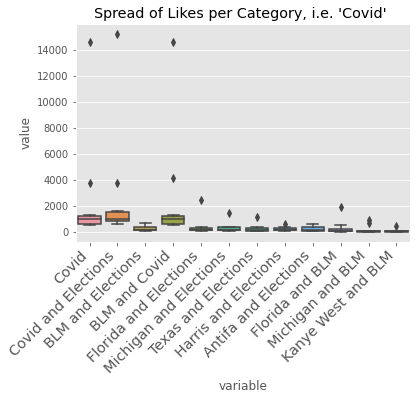

In [ ]:
#Visualization Cell - Boxplots (Likes)

boxplot_visualizations(master_category_list, "like", master_list_one)

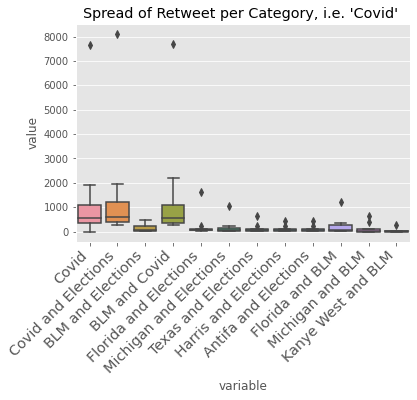

In [ ]:
#Visualization Cell - Boxplots (retweets)

boxplot_visualizations(master_category_list, "retweet", master_list_one)

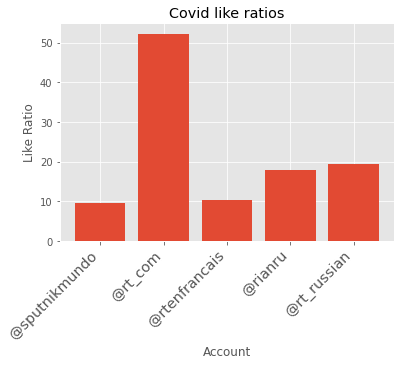

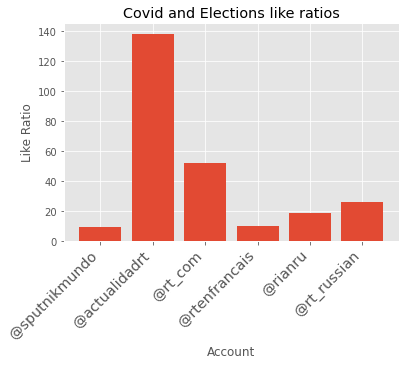

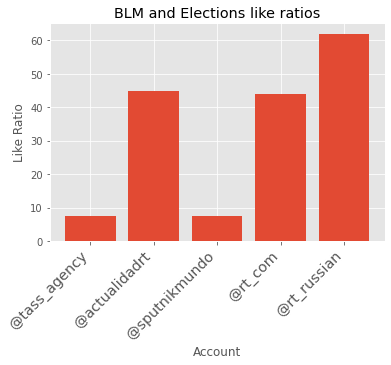

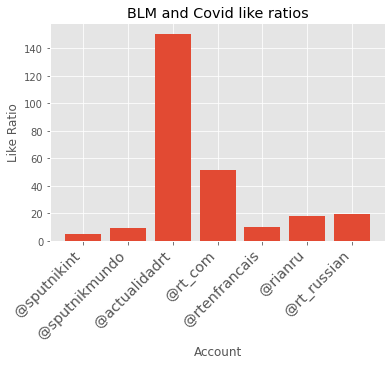

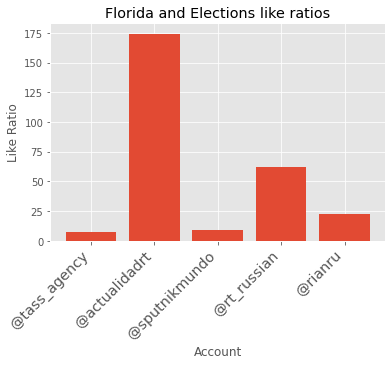

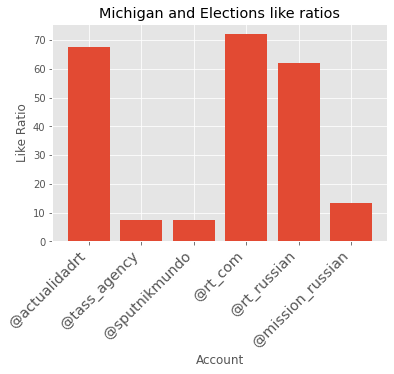

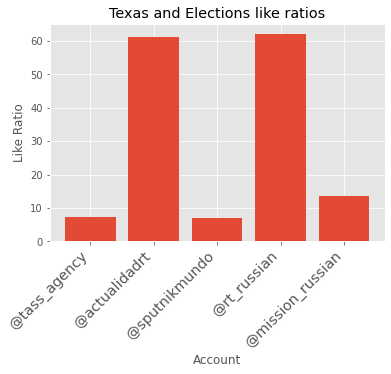

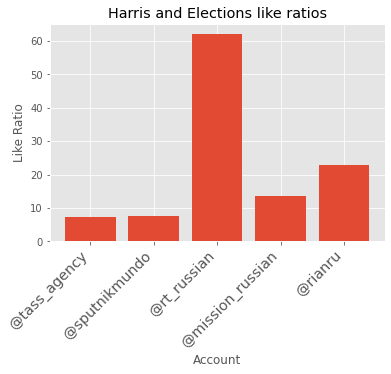

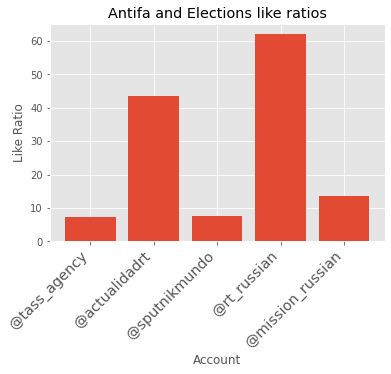

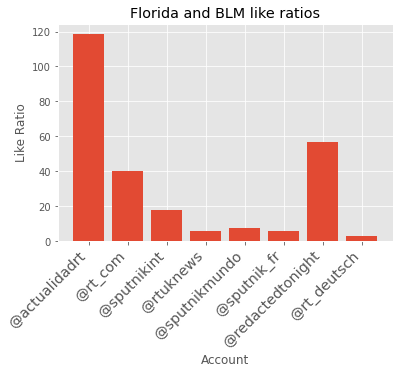

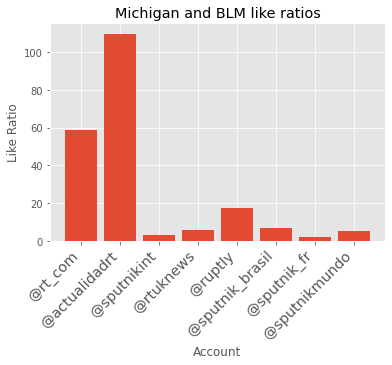

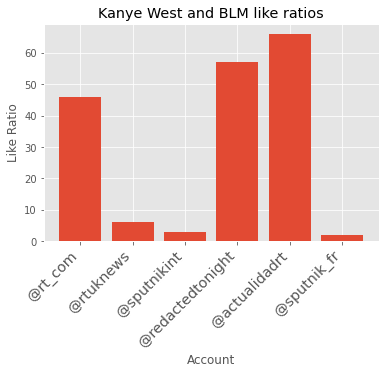

In [ ]:
#Visualization Cell - Bar Graph (Likes)

bar_chart_likes(master_list_one)

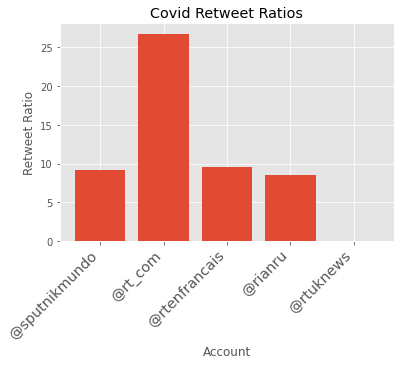

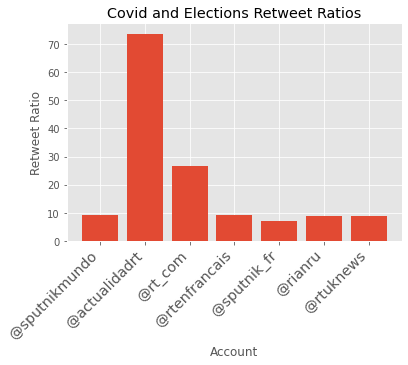

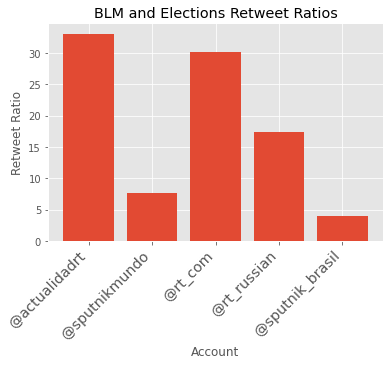

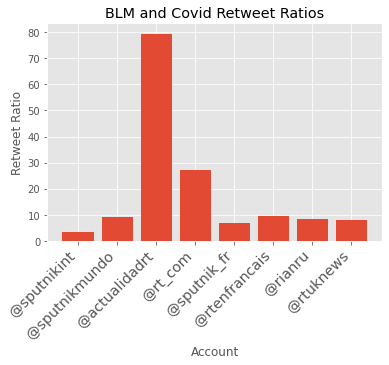

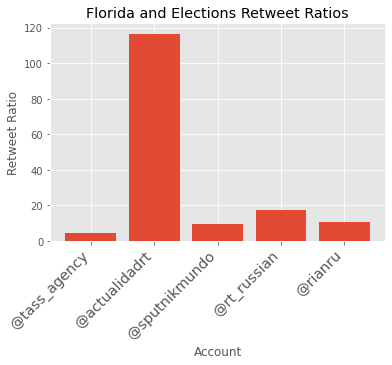

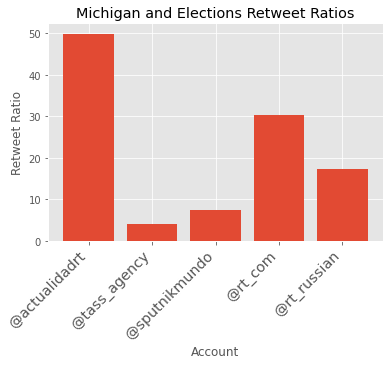

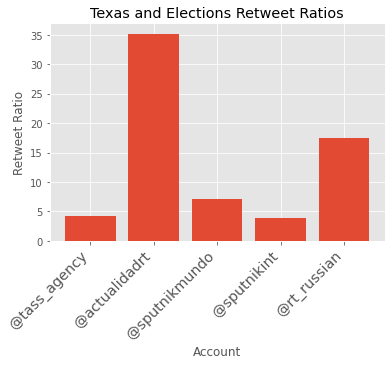

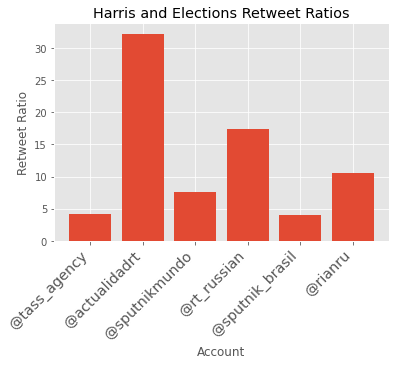

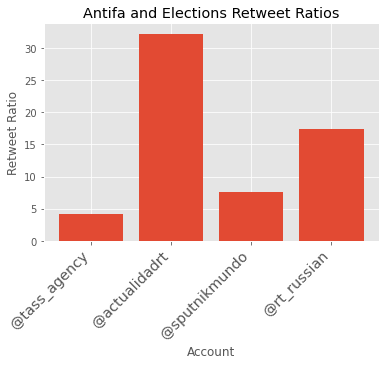

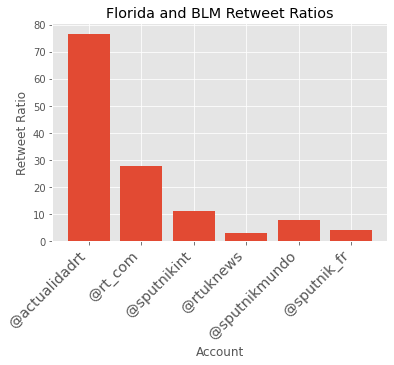

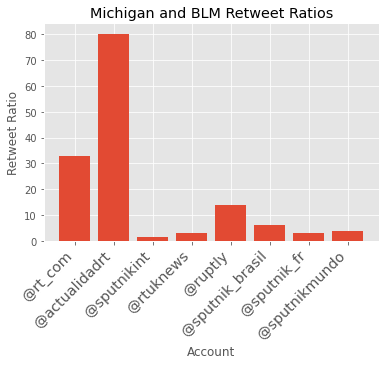

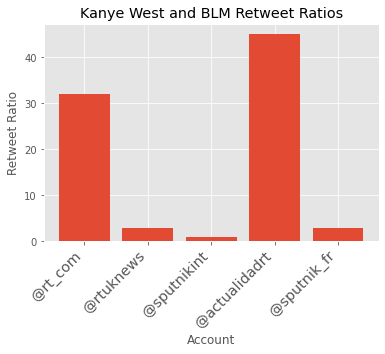

In [ ]:
#Visualization Cell - Bar Graph (Retweets)

bar_chart_retweets(master_list_one)

### 

### Min-Max Functionality:
The output of this code shows the accounts with the most like to tweet ratio and like to retweet ratio, as well as the accounts with the lowest like to tweet ratio and retweet ratio for every category. 


In [ ]:
#Min Max Output

min_max_output(master_list_one)

Covid --> The account with the highest like ratio is @rt_com with a 52.19718309859155 like to tweet ratio.
Covid --> The account with the lowest like ratio is @sputnikmundo with a 9.484615384615385 like to tweet ratio.
Covid --> The account with the highest retweet ratio is @rt_com with a 26.760563380281692 retweet to tweet ratio.
Covid --> The account with the lowest retweet ratio is @rtuknews with a 0.0 retweet to tweet ratio.


Covid and Elections --> The account with the highest like ratio is @actualidadrt with a 138.1818181818182 like to tweet ratio.
Covid and Elections --> The account with the lowest like ratio is @sputnikmundo with a 9.307692307692308 like to tweet ratio.
Covid and Elections --> The account with the highest retweet ratio is @actualidadrt with a 73.67272727272727 retweet to tweet ratio.
Covid and Elections --> The account with the lowest retweet ratio is @sputnik_fr with a 6.950819672131147 retweet to tweet ratio.


BLM and Elections --> The account with the high

### Naive Bayes Probability Results

Naive Bayes Methodology; for the most significant categories

where P(retweet|some category) = (P(some category | retweets) * P(retweets)) / P(some category)

where P(like|some category) = (P(some category | like) * P(like)) / P(some category)


In [ ]:
#Naive Bayes Output - top 4 significant categories

naive_analysis(4, master_list_one)

--> The Probabilitiy of retweets given florida election is:  0.38524077548467794
--> The Probabilitiy of retweets given covid is:  0.35288203753351205
--> The Probabilitiy of retweets given blm covid is:  0.3590297308155886
--> The Probabilitiy of retweets given covid election is:  0.3578916925746511


--> The Probabilitiy of likes given florida election is:  0.6147592245153221
--> The Probabilitiy of likes given covid is:  0.6471179624664879
--> The Probabilitiy of likes given blm covid is:  0.6409702691844115
--> The Probabilitiy of likes given covid election is:  0.6421083074253489


### Linear Regression Model

Using Likes as a the dependent variable, and retweets are the independent variable for Covid, Covid & Election, and BLM and Covid

Score:  0.7326392604495773
Coef:  [[0.79118363]]
Intercept:  [379.36174378]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     984.4
Date:                Sun, 20 Dec 2020   Prob (F-statistic):           6.96e-08
Time:                        22:13:49   Log-Likelihood:                -58.239
No. Observations:                   8   AIC:                             120.5
Df Residuals:                       6   BIC:                             120.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

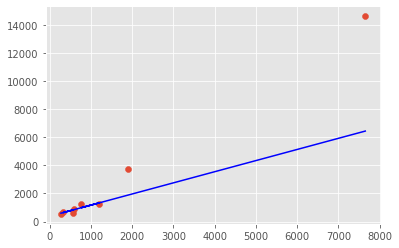

In [ ]:
#Regression

linear_regression_output(get_x_y(master_list_one, "Covid"))

Score:  0.854967608574957
Coef:  [[1.71837119]]
Intercept:  [-82.2109922]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     925.4
Date:                Sun, 20 Dec 2020   Prob (F-statistic):           8.37e-08
Time:                        22:13:50   Log-Likelihood:                -58.778
No. Observations:                   8   AIC:                             121.6
Df Residuals:                       6   BIC:                             121.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

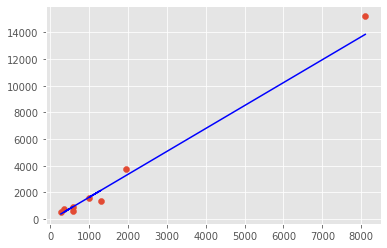

In [ ]:
linear_regression_output(get_x_y(master_list_one, "Covid and Elections"))

Score:  0.9946578729995702
Coef:  [[1.9197213]]
Intercept:  [-270.09578558]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     1073.
Date:                Sun, 20 Dec 2020   Prob (F-statistic):           5.39e-08
Time:                        22:13:50   Log-Likelihood:                -57.916
No. Observations:                   8   AIC:                             119.8
Df Residuals:                       6   BIC:                             120.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

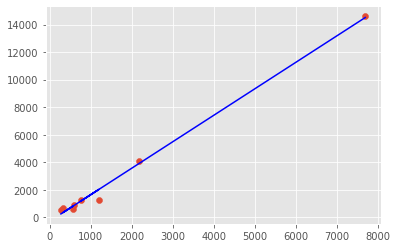

In [ ]:
linear_regression_output(get_x_y(master_list_one, "BLM and Covid"))

## Time Series Analysis, Covid Related Tweets

In [ ]:
covid = [master_list_one[0], master_list_two[0], master_list_three[0], master_list_four[0], master_list_five[0]]
covid_blm = [master_list_one[3], master_list_two[3], master_list_three[3], master_list_four[3], master_list_five[3]]
covid_election = [master_list_one[1], master_list_two[1], master_list_three[1], master_list_four[1], master_list_five[1]]

In [ ]:
covid_data = [covid, covid_blm, covid_election]

In [ ]:
def mini_time_series(df_list, title):

    likes = []
    retweets = []
    tweets = []

    for i in range(len(df_list)):
        sum_likes = df_list[i].iloc[:, [3]].sum()
        sum_retweets = df_list[i].iloc[:, [5]].sum()
        sum_tweets = df_list[i].iloc[:, [1]].sum()

        likes.append(sum_likes)
        retweets.append(sum_retweets)
        tweets.append(sum_tweets)

        
        sum_likes = 0
        sum_retweets = 0
        sum_tweets = 0
    
    #time Series

    time_series_df = pd.DataFrame(columns = ['Time', 'Likes', 'Retweets', 'Tweets'])
    time_series_df['Likes'] = likes
    time_series_df['Retweets'] = retweets
    time_series_df['Tweets'] = tweets
    time_series_df['Time'] = ["9/16-9/22", "9/23-9/29", "9/30-10/6", "10/7-10/14", "10/15-10/22"]

    plt.plot( 'Time', 'Likes', data=time_series_df, marker='', color='skyblue', linewidth=2)
    plt.plot( 'Time', 'Retweets', data=time_series_df, marker='', color='red', linewidth=2)
    plt.plot( 'Time', 'Tweets', data=time_series_df, marker='', color='green', linewidth=2)
    plt.title(title)
    plt.legend()

    


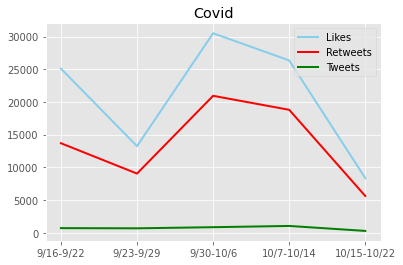

In [ ]:
mini_time_series(covid, "Covid")


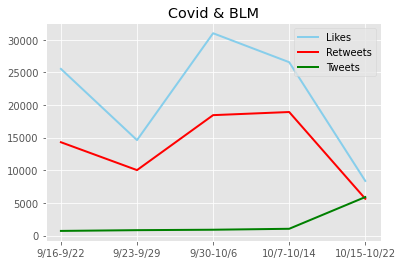

In [ ]:
mini_time_series(covid_blm, "Covid & BLM")

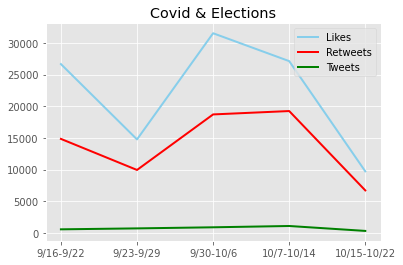

In [ ]:
mini_time_series(covid_election, "Covid & Elections")

In [ ]:
def bar_comparison(data_list):

    #Covid
    sum_likes_covid = 0
    sum_retweets_covid = 0
    sum_tweets_covid = 0
    covid_list = data_list[0]
    for i in range(len(covid_list)):
        sum_likes_covid += covid_list[i].iloc[:, [3]].sum()
        sum_retweets_covid += covid_list[i].iloc[:, [5]].sum()
        sum_tweets_covid += covid_list[i].iloc[:, [1]].sum()
    cov_final = (sum_likes_covid.values[0], sum_retweets_covid.values[0], sum_tweets_covid.values[0])
    #Covid and BLM
    sum_likes_covid_blm = 0
    sum_retweets_covid_blm = 0
    sum_tweets_covid_blm = 0
    covid_list_blm = data_list[1]
    for i in range(len(covid_list_blm)):
        sum_likes_covid_blm += covid_list_blm[i].iloc[:, [3]].sum()
        sum_retweets_covid_blm += covid_list_blm[i].iloc[:, [5]].sum()
        sum_tweets_covid_blm += covid_list_blm[i].iloc[:, [1]].sum()
    cov_blm_final = (sum_likes_covid_blm.values[0], sum_retweets_covid_blm.values[0], sum_tweets_covid_blm.values[0])
    #Covid and Elections
    sum_likes_covid_elec = 0
    sum_retweets_covid_elec = 0
    sum_tweets_covid_elec = 0
    covid_list_elec = data_list[2]
    for i in range(len(covid_list_elec)):
        sum_likes_covid_elec += covid_list_elec[i].iloc[:, [3]].sum()
        sum_retweets_covid_elec += covid_list_elec[i].iloc[:, [5]].sum()
        sum_tweets_covid_elec += covid_list_elec[i].iloc[:, [1]].sum()
    cov_elec_final = (sum_likes_covid_elec.values[0], sum_retweets_covid_elec.values[0], sum_tweets_covid_elec.values[0])
    
    #create the bar chart analysis

    # data to plot
    n_groups = 3
    # create plot
    fig, ax = plt.subplots()
    index = np.arange(n_groups)
    bar_width = 0.3
    opacity = 0.8
    
    rects1 = plt.bar(index, cov_final, bar_width,
    alpha=opacity,
    color='b',
    label='Covid')
    
    rects2 = plt.bar(index + bar_width, cov_blm_final, bar_width,
    alpha=opacity,
    color='g',
    label='Covid BLM')

    rects3 = plt.bar(index + (bar_width*2), cov_elec_final, bar_width,
    alpha=opacity,
    color='r',
    label='Covid Elections')

    plt.xlabel('Covid Related Metrics')
    plt.ylabel('Frequency')
    plt.title('Covid Related Comparisons')
    plt.xticks(index + bar_width, ('Likes', 'Retweets', 'Tweets'))
    plt.legend()

    plt.tight_layout()
    plt.show()

    df = pd.DataFrame(columns = ['Categories','Covid', 'Covid BLM', 'Covid Elections'])
    cats = ["Likes", "Retweets", "Tweets"]
    df['Categories'] = cats
    df['Covid'] = cov_final
    df['Covid BLM'] = cov_blm_final
    df['Covid Elections'] = cov_elec_final

    print(df)
    

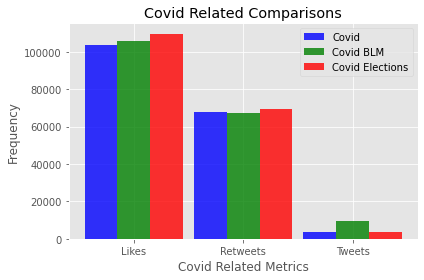

  Categories     Covid  Covid BLM  Covid Elections
0      Likes  103552.0     106053         109767.0
1   Retweets   68090.0      67338          69481.0
2     Tweets    3531.0       9402           3707.0


In [ ]:
bar_comparison(covid_data)